In [0]:
# https://www.datacamp.com/courses/designing-machine-learning-workflows-in-python

- Recall = tp/(tp + fn) > **actual positive** = true positive + false negative


- precision = tp/(tp+fp) > **total predicted positive** = true positive + false positive

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from scipy.stats import chi2
from scipy.spatial.distance import pdist, squareform
import pickle

from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import IsolationForest as isof
from sklearn.metrics import accuracy_score, f1_score, precision_score, make_scorer
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor as lof
from sklearn.neighbors import DistanceMetric as dm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM as onesvm

In [0]:
! pip install StringDist
import stringdist

**Course Description**

Deploying machine learning models in production seems easy with modern tools, but often ends in disappointment as the model performs worse in production than in development. This course will give you four superpowers that will make you stand out from the data science crowd and build pipelines that stand the test of time: how to exhaustively tune every aspect of your model in development; how to make the best possible use of available domain expertise; how to monitor your model in performance and deal with any performance deterioration; and finally how to deal with poorly or scarcely labelled data. Digging deep into the cutting edge of sklearn, and dealing with real-life datasets from hot areas like personalized healthcare and cybersecurity, this course reveals a view of machine learning from the frontline.

## 1. The Standard Workflow

In this chapter, you will be reminded of the basics of a supervised learning workflow, complete with model fitting, tuning and selection, feature engineering and selection, and data splitting techniques. You will understand how these steps in a workflow depend on each other, and recognize how they can all contribute to, or fight against overfitting: the data scientist's worst enemy. By the end of the chapter, you will already be fluent in supervised learning, and ready to take the dive towards more advanced material in later chapters.

#### Supervised learning pipelines

**Feature engineering**

You are tasked to predict whether a new cohort of loan applicants are likely to default on their loans. You have a historical dataset and wish to train a classifier on it. You notice that many features are in string format, which is a problem for your classifiers. You hence decide to encode the string columns numerically using `LabelEncoder()`. The function has been preloaded for you from the preprocessing submodule of sklearn. The dataset credit is also preloaded, as is a list of all column names whose data types are string, stored in `non_numeric_columns`.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
credit = pd.read_csv('credit.csv')

In [0]:
# Inspect the first 3 lines of your data using head()
credit.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [0]:
non_numeric_columns = ['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [0]:
# Create a label encoder for each column. Encode the values
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

In [0]:
# Inspect the data types of the columns of the data frame
print(credit.dtypes)

checking_status             int64
duration                    int64
credit_history              int64
purpose                     int64
credit_amount               int64
savings_status              int64
employment                  int64
installment_commitment      int64
personal_status             int64
other_parties               int64
residence_since             int64
property_magnitude          int64
age                         int64
other_payment_plans         int64
housing                     int64
existing_credits            int64
job                         int64
num_dependents              int64
own_telephone               int64
foreign_worker              int64
class                      object
diff                      float64
dtype: object


In [0]:
credit.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,diff
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good,2102.258
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad,2679.742
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good,1175.258
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good,4610.742
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad,1598.742


In [0]:
data = credit[:]
y = data['class']
del data['class']
X = data

In [0]:
# sanity check
print('X dimension: ', X.shape) # ((1000, 20))
print('y dimension: ', y.shape) # (1000,)
X[:5]

X dimension:  (1000, 21)
y dimension:  (1000,)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,diff
0,1,6,1,4,1169,4,3,4,3,2,4,2,67,1,1,2,3,1,1,1,2102.258
1,0,48,3,4,5951,2,0,2,0,2,2,2,22,1,1,1,3,1,0,1,2679.742
2,3,12,1,6,2096,2,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1175.258
3,1,42,3,2,7882,2,1,2,3,1,4,0,45,1,0,1,3,2,0,1,4610.742
4,1,24,2,3,4870,2,0,3,3,2,4,1,53,1,0,2,3,2,0,1,1598.742


**Your first pipeline**

Your colleague has used AdaBoostClassifier for the credit scoring dataset. You want to also try out a random forest classifier. In this exercise, you will fit this classifier to the data and compare it to AdaBoostClassifier. Make sure to use train/test data splitting to avoid overfitting. The data is preloaded and transformed so that all features are numeric. The features are available as X and the labels as y. The module RandomForestClassifier has also been preloaded.

- Split the data into train (X_train and y_train) and test (X_test and y_test). Use 20% of the examples for the test set.

In [0]:
# Split the data into train and test, with 20% as test
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

- Fit a RandomForest classifier to the training set and predict the labels of the test data.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Create a random forest classifier, fixing the seed to 2
rf_model = RandomForestClassifier(random_state=2).fit(
  X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)

- Use accuracy_score to assess the performance of your classifier. An empty dictionary called accuracies is pre-loaded in your environment.

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# empty dict
accuracies = {}

In [0]:
# Assess the accuracy of both classifiers
accuracies['rf'] = accuracy_score(y_test, rf_predictions)

#### Model complexity and overfitting

**Grid search CV for model complexity**

In the last slide, you saw how most classifiers have one or more hyperparameters that control its complexity. You also learned to tune them using GridSearchCV(). In this exercise, you will perfect this skill. You will experiment with:

- The number of trees, n_estimators, in a RandomForestClassifier.
- The maximum depth, max_depth, of the decision trees used in an AdaBoostClassifier.
- The number of nearest neighbors, n_neighbors, in KNeighborsClassifier.

In [0]:
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50, 10)}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# Optimize for a RandomForestClassifier using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_estimators': 40}

- Adapt your code to optimise n_estimators for an AdaBoostClassifier().

In [0]:
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
# Optimize for a AdaBoostClassifier using GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_estimators': 10}

- Adapt your code to optimise n_neighbors for an KNeighborsClassifier().

In [0]:
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Optimize for KNeighborsClassifier using GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_neighbors': 50}

#### Feature engineering and overfitting

**Categorical encodings**

Your colleague has converted the columns in the credit dataset to numeric values using LabelEncoder(). He left one out: credit_history, which records the credit history of the applicant. You want to create two versions of the dataset. One will use LabelEncoder() and another one-hot encoding, for comparison purposes. The feature matrix is available to you as credit. You have LabelEncoder() preloaded and pandas as pd.

- Encode credit_history using LabelEncoder().
- Concatenate the result to the original frame.
- Create a new data frame by concatenating the 1-hot encoding dummies to the original frame.
- Confirm that 1-hot encoding produces more columns than label encoding.

In [0]:
credit.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [0]:
# Create numeric encoding for credit_history
credit_history_num = LabelEncoder().fit_transform(
  credit['credit_history'])

In [0]:
# Create a new feature matrix including the numeric encoding
X_num = pd.concat([X, pd.Series(credit_history_num)], axis=1)

In [0]:
print('X_num dimension: ', X_num.shape)
X_num.head(5)

X_num dimension:  (1000, 22)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,diff,0
0,1,6,1,4,1169,4,3,4,3,2,4,2,67,1,1,2,3,1,1,1,2102.258,1
1,0,48,3,4,5951,2,0,2,0,2,2,2,22,1,1,1,3,1,0,1,2679.742,3
2,3,12,1,6,2096,2,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1175.258,1
3,1,42,3,2,7882,2,1,2,3,1,4,0,45,1,0,1,3,2,0,1,4610.742,3
4,1,24,2,3,4870,2,0,3,3,2,4,1,53,1,0,2,3,2,0,1,1598.742,2


In [0]:
# Create new feature matrix with dummies for credit_history
X_hot = pd.concat(
  [X, pd.get_dummies(credit['credit_history'])], axis=1)

In [0]:
print('X_hot dimension: ', X_hot.shape)
X_hot.head(5)

X_hot dimension:  (1000, 26)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,diff,0,1,2,3,4
0,1,6,1,4,1169,4,3,4,3,2,4,2,67,1,1,2,3,1,1,1,2102.258,0,1,0,0,0
1,0,48,3,4,5951,2,0,2,0,2,2,2,22,1,1,1,3,1,0,1,2679.742,0,0,0,1,0
2,3,12,1,6,2096,2,1,2,3,2,3,2,49,1,1,1,2,2,0,1,1175.258,0,1,0,0,0
3,1,42,3,2,7882,2,1,2,3,1,4,0,45,1,0,1,3,2,0,1,4610.742,0,0,0,1,0
4,1,24,2,3,4870,2,0,3,3,2,4,1,53,1,0,2,3,2,0,1,1598.742,0,0,1,0,0


In [0]:
# Compare the number of features of the resulting DataFrames
X_hot.shape[1] > X_num.shape[1]

True

**Feature transformations**

You are discussing the credit dataset with the bank manager. She suggests that the safest loan applications tend to request mid-range credit amounts. Values that are either too low or too high suggest high risk. This means that a non-linear relationship might exist between this variable and the class. You want to test this hypothesis. You will construct a non-linear transformation of the feature. Then, you will assess which of the two features is better at predicting the class using `SelectKBest()` and the `chi2()` metric, both of which have been preloaded.



The data is available as a pandas DataFrame called credit, with the class contained in the column class. You also have preloaded pandas as pd and numpy as np.

- Define a function that transforms a numeric vector by considering the absolute difference of each value from the average value of the vector.
- Apply this transformation to the credit_amount column of the dataset and store in new column called diff
- Create a `SelectKBest()` feature selector to pick one of the two columns, credit_amount and diff using the `chi2()` metric.
- Inspect the results.

In [0]:
# Function computing absolute difference from column mean
def abs_diff(x):
    return np.abs(x-np.mean(x))

In [0]:
# Apply it to the credit amount and store to new column
credit['diff'] = abs_diff(credit['credit_amount'])

In [0]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2

In [0]:
# Create a feature selector with chi2 that picks one feature
sk = SelectKBest(chi2, k=1)

In [0]:
# Use the selector to pick between credit_amount and diff
sk.fit(credit[['credit_amount', 'diff']], credit['class'])

SelectKBest(k=1,
            score_func=<scipy.stats._continuous_distns.chi2_gen object at 0x7f503ccbbac8>)

In [0]:
credit.dtypes

checking_status            object
duration                    int64
credit_history             object
purpose                    object
credit_amount               int64
savings_status             object
employment                 object
installment_commitment      int64
personal_status            object
other_parties              object
residence_since             int64
property_magnitude         object
age                         int64
other_payment_plans        object
housing                    object
existing_credits            int64
job                        object
num_dependents              int64
own_telephone              object
foreign_worker             object
class                      object
diff                      float64
dtype: object

In [0]:
# Inspect the results
sk.get_support()

TypeError: ignored

**Bringing it all together**

You just joined an arrhythmia detection startup and want to train a model on the arrhythmias dataset arrh. You noticed that random forests tend to win quite a few Kaggle competitions, so you want to try that out with a maximum depth of 2, 5, or 10, using grid search. You also observe that the dimension of the dataset is quite high so you wish to consider the effect of a feature selection method.

To make sure you don't overfit by mistake, you have already split your data. You will use X_train and y_train for the grid search, and X_test and y_test to decide if feature selection helps. All four dataset folds are preloaded in your environment. You also have access to GridSearchCV(), train_test_split(), SelectKBest(), chi2() and RandomForestClassifier as rfc.

- Use grid search to experiment with a maximum depth of 2, 5, and 10 for RandomForestClassifier and store the best performing parameter setting.
- Now refit the estimator using the best-performing number of estimators as deduced above.
- Apply the SelectKBest feature selector with the chi2 scoring function and refit the classifier.

In [0]:
arrh = pd.read_csv('arrh.csv')
print('data dimension: ', arrh.shape)
arrh.head(4)

data dimension:  (452, 280)


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,70,78,11,69,29,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,113,3,69,69,19,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,110,85,106,61,41,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,58,10,57,69,37,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1


In [0]:
#@title
tr_idx = [223,
 305,
 162,
 291,
 93,
 350,
 427,
 353,
 41,
 187,
 168,
 95,
 106,
 405,
 92,
 122,
 23,
 13,
 61,
 271,
 39,
 285,
 409,
 346,
 98,
 410,
 411,
 337,
 258,
 224,
 127,
 82,
 428,
 345,
 27,
 89,
 349,
 73,
 69,
 186,
 91,
 201,
 289,
 339,
 125,
 423,
 59,
 120,
 12,
 347,
 214,
 451,
 213,
 157,
 304,
 236,
 373,
 366,
 179,
 403,
 310,
 88,
 131,
 124,
 174,
 283,
 14,
 375,
 315,
 123,
 138,
 111,
 51,
 112,
 9,
 242,
 16,
 365,
 0,
 314,
 105,
 247,
 359,
 436,
 270,
 382,
 70,
 447,
 38,
 150,
 268,
 163,
 167,
 225,
 206,
 233,
 434,
 425,
 145,
 245,
 312,
 325,
 42,
 160,
 364,
 250,
 275,
 256,
 444,
 340,
 391,
 354,
 430,
 251,
 378,
 147,
 260,
 228,
 100,
 34,
 188,
 110,
 175,
 53,
 227,
 135,
 421,
 450,
 154,
 19,
 142,
 363,
 158,
 309,
 44,
 307,
 277,
 113,
 287,
 211,
 108,
 388,
 169,
 79,
 426,
 84,
 8,
 32,
 99,
 392,
 370,
 222,
 28,
 331,
 55,
 429,
 351,
 48,
 372,
 318,
 33,
 35,
 63,
 327,
 234,
 442,
 45,
 177,
 219,
 343,
 21,
 248,
 199,
 137,
 24,
 184,
 205,
 134,
 116,
 212,
 407,
 386,
 300,
 231,
 217,
 56,
 355,
 330,
 328,
 181,
 97,
 114,
 278,
 118,
 338,
 170,
 389,
 54,
 176,
 194,
 198,
 182,
 368,
 103,
 220,
 130,
 326,
 60,
 94,
 193,
 140,
 148,
 202,
 152,
 385,
 10,
 269,
 96,
 210,
 240,
 57,
 301,
 344,
 36,
 404,
 20,
 397,
 332,
 75,
 200,
 77,
 263,
 445,
 149,
 449,
 2,
 52,
 262,
 253,
 259,
 333,
 321,
 183,
 151,
 408,
 302,
 190,
 74,
 348,
 243,
 437,
 87,
 239,
 143,
 376,
 266,
 288,
 136,
 166,
 83,
 400,
 155,
 356,
 279,
 126,
 195,
 265,
 415,
 104,
 153,
 282,
 226,
 367,
 25,
 196,
 64,
 15,
 297,
 371,
 109,
 336,
 308,
 26,
 76,
 43,
 280,
 3,
 414,
 49,
 387,
 440,
 30,
 121,
 115,
 420,
 216,
 264,
 209,
 316,
 384,
 1,
 313,
 22,
 317,
 319,
 7,
 446,
 141,
 86,
 352,
 241,
 215,
 68,
 50,
 398,
 413,
 156,
 252,
 395,
 402,
 357,
 254,
 276,
 178,
 281,
 390,
 237,
 71,
 129,
 144,
 335,
 133,
 203,
 393,
 255,
 72,
 396,
 235,
 37]
print('train index dimension: ', len(tr_idx))
tr_idx[:5]

train index dimension:  339


[223, 305, 162, 291, 93]

In [0]:
#@title
test_idx = [207,
 383,
 65,
 197,
 208,
 435,
 246,
 399,
 173,
 298,
 238,
 159,
 4,
 358,
 342,
 185,
 232,
 47,
 102,
 412,
 295,
 146,
 284,
 67,
 66,
 294,
 31,
 62,
 5,
 165,
 128,
 320,
 334,
 17,
 161,
 299,
 369,
 132,
 441,
 90,
 422,
 267,
 119,
 180,
 362,
 29,
 221,
 360,
 406,
 418,
 107,
 192,
 329,
 257,
 439,
 443,
 204,
 374,
 311,
 438,
 324,
 290,
 273,
 172,
 191,
 401,
 229,
 296,
 381,
 171,
 6,
 380,
 417,
 164,
 306,
 416,
 432,
 431,
 424,
 58,
 341,
 78,
 261,
 394,
 303,
 244,
 292,
 18,
 40,
 286,
 139,
 272,
 101,
 379,
 448,
 230,
 80,
 46,
 249,
 117,
 85,
 361,
 81,
 377,
 274,
 433,
 293,
 218,
 323,
 189,
 419,
 322,
 11]
print('test index dimenstion: ', len(test_idx))
test_idx[:5]

test index dimenstion:  113


[207, 383, 65, 197, 208]

In [0]:
data_arrh = arrh[:].astype(np.float64)
y = data_arrh['class']
del data_arrh['class']
X = data_arrh

In [0]:
X_train = X.loc[tr_idx]
y_train = y.loc[tr_idx]
X_test = X.loc[test_idx]
y_test = y.loc[test_idx]

In [0]:
# sanity check
X_train[:5]

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
223,83.0,1.0,160.0,55.0,84.0,186.0,358.0,166.0,113.0,35.0,139.0,77.0,88.0,69.0,50.0,20.0,40.0,32.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,0.0,13.4,-9.6,0.0,0.0,0.8,5.6,16.0,66.4,-0.1,0.0,17.2,-6.8,0.0,0.0,1.0,4.7,26.3,72.3,-1.1,0.0,17.4,-5.2,0.0,0.0,0.9,3.6,26.8,60.6,0.0,0.0,13.1,-2.2,0.0,0.0,0.8,3.0,24.0,52.8
305,14.0,0.0,175.0,59.0,96.0,141.0,340.0,225.0,87.0,80.0,112.0,70.0,102.0,69.0,49.0,0.0,44.0,32.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,44.0,24.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,3.3,0.0,9.8,-23.6,0.0,0.0,0.4,5.1,-35.1,25.0,1.9,0.0,18.8,-18.3,0.0,0.0,0.7,7.7,23.2,106.3,0.2,-0.8,21.4,-6.2,0.0,0.0,0.6,5.5,33.6,93.0,0.1,-0.8,14.3,-2.5,0.0,0.0,0.5,3.4,24.8,57.4
162,54.0,0.0,170.0,78.0,113.0,216.0,414.0,193.0,170.0,50.0,142.0,73.0,98.0,69.0,27.0,0.0,68.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,21.3,-20.8,0.0,0.0,0.5,5.7,-19.7,35.0,-0.4,-1.1,23.8,-11.8,0.0,0.0,1.4,5.9,1.4,54.5,-0.2,-0.9,14.3,-1.5,0.0,0.0,1.3,4.6,25.9,67.3,-0.2,-0.7,8.9,0.0,0.0,0.0,1.0,3.2,33.0,61.8
291,45.0,0.0,170.0,74.0,99.0,164.0,381.0,190.0,92.0,50.0,150.0,82.0,104.0,11.0,27.0,28.0,56.0,32.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,48.0,40.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.3,0.0,11.8,-7.6,0.0,0.0,0.3,11.0,17.8,114.6,-1.0,-0.9,23.1,-2.0,0.0,0.0,0.7,6.4,51.2,89.6,-1.2,-1.6,18.1,0.0,0.0,0.0,0.6,2.9,48.7,73.0,-1.0,-1.5,13.2,0.0,0.0,0.0,0.6,1.4,34.8,46.5
93,62.0,1.0,165.0,70.0,72.0,169.0,328.0,135.0,85.0,-13.0,47.0,43.0,4.0,35.0,3.0,0.0,48.0,16.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,36.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,...,-1.0,0.0,10.4,-6.5,0.0,0.0,-0.4,2.2,7.8,21.0,-0.8,0.0,9.3,-5.2,0.0,0.0,0.6,1.1,7.2,13.5,-0.5,0.0,6.9,-2.9,0.0,0.0,0.5,0.7,7.5,11.4,-0.2,0.0,4.2,-1.2,0.0,0.0,0.5,0.7,6.0,10.7


In [0]:
y_train[:5]

223    1.0
305    1.0
162    1.0
291    0.0
93     0.0
Name: class, dtype: float64

In [0]:
rfc = RandomForestClassifier

In [0]:
rfc

sklearn.ensemble.forest.RandomForestClassifier

In [0]:
# Find the best value for max_depth among values 2, 5 and 10
grid_search = GridSearchCV(
  rfc(random_state=1), param_grid={'max_depth':[2,5,10]})
best_value = grid_search.fit(
  X_train, y_train).best_params_['max_depth']

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245:

In [0]:
# Using the best value from above, fit a random forest
clf = rfc(
  random_state=1, max_depth=best_value).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
# Apply SelectKBest with chi2 and pick top 100 features
vt = SelectKBest(chi2, k=100).fit(X_train, y_train)

In [0]:
vt

SelectKBest(k=100,
            score_func=<scipy.stats._continuous_distns.chi2_gen object at 0x7fbb0c27e2e8>)

In [0]:
X_train.dtypes # float!

age                           float64
sex                           float64
height                        float64
weight                        float64
QRSduration                   float64
PRinterval                    float64
Q-Tinterval                   float64
Tinterval                     float64
Pinterval                     float64
QRS                           float64
T                             float64
P                             float64
QRST                          float64
J                             float64
heartrate                     float64
chDI_Qwave                    float64
chDI_Rwave                    float64
chDI_Swave                    float64
chDI_RPwave                   float64
chDI_SPwave                   float64
chDI_intrinsicReflecttions    float64
chDI_RRwaveExists             float64
chDI_DD_RRwaveExists          float64
chDI_RPwaveExists             float64
chDI_DD_RPwaveExists          float64
chDI_RTwaveExists             float64
chDI_DD_RTwa

In [0]:
# Create a new dataset only containing the selected features
X_train_reduced = vt.transform(X_train)

TypeError: ignored

## 2. The Human in the Loop

In the previous chapter, you perfected your knowledge of the standard supervised learning workflows. In this chapter, you will critically examine the ways in which expert knowledge is incorporated in supervised learning. This is done through the identification of the appropriate unit of analysis which might require feature engineering across multiple data sources, through the sometimes imperfect process of labeling examples, and through the specification of a loss function that captures the true business value of errors made by your machine learning model.

#### Data fusion

**Is the source or the destination bad?**

In the previous lesson, you used the destination computer as your entity of interest. However, your cybersecurity analyst just told you that it is the infected machines that generate the bad traffic, and will therefore appear as a source, not a destination, in the flows dataset.

The data flows has been preloaded, as well as the list bad of infected IDs and the feature extractor featurizer() from the previous lesson. You also have numpy available as np, AdaBoostClassifier(), and cross_val_score().

- Create a data frame where each row is a feature vector for a source_computer. Group by source computer ID in the flows dataset and apply the feature extractor to each group.
- Convert the iterator to a data frame by calling list() on it.
- Create labels by checking whether each source_computer ID belongs in the list of bads you have been given.
- Assess an AdaBoostClassifier() on this data using cross_val_score().

In [0]:
flows = pd.read_csv('lanl_flows.csv')
print('df shape: ', flows.shape)
flows.head(5)

df shape:  (10000, 9)


,time,duration,source_computer,source_port,destination_computer,destination_port,protocol,packet_count,byte_count
0,471692,0,C5808,N24128,C26871,N17023,6,1,60
1,471692,0,C5808,N2414,C26871,N19148,6,1,60
2,471692,0,C5808,N24156,C26871,N8001,6,1,60
3,471692,0,C5808,N24161,C26871,N18502,6,1,60
4,471692,0,C5808,N24162,C26871,N11309,6,1,60


In [0]:
#@title
# infected ID
bads = {'C1',
 'C10',
 'C10005',
 'C1003',
 'C1006',
 'C1014',
 'C1015',
 'C102',
 'C1022',
 'C1028',
 'C10405',
 'C1042',
 'C1046',
 'C10577',
 'C1065',
 'C108',
 'C10817',
 'C1085',
 'C1089',
 'C1096',
 'C11039',
 'C11178',
 'C1119',
 'C11194',
 'C1124',
 'C1125',
 'C113',
 'C115',
 'C11727',
 'C1173',
 'C1183',
 'C1191',
 'C12116',
 'C1215',
 'C1222',
 'C1224',
 'C12320',
 'C12448',
 'C12512',
 'C126',
 'C1268',
 'C12682',
 'C1269',
 'C1275',
 'C1302',
 'C1319',
 'C13713',
 'C1382',
 'C1415',
 'C143',
 'C1432',
 'C1438',
 'C1448',
 'C1461',
 'C1477',
 'C1479',
 'C148',
 'C1482',
 'C1484',
 'C1493',
 'C15',
 'C1500',
 'C1503',
 'C1506',
 'C1509',
 'C15197',
 'C152',
 'C15232',
 'C1549',
 'C155',
 'C1555',
 'C1567',
 'C1570',
 'C1581',
 'C16088',
 'C1610',
 'C1611',
 'C1616',
 'C1626',
 'C1632',
 'C16401',
 'C16467',
 'C16563',
 'C1710',
 'C1732',
 'C1737',
 'C17425',
 'C17600',
 'C17636',
 'C17640',
 'C17693',
 'C177',
 'C1776',
 'C17776',
 'C17806',
 'C1784',
 'C17860',
 'C1797',
 'C18025',
 'C1810',
 'C18113',
 'C18190',
 'C1823',
 'C18464',
 'C18626',
 'C1887',
 'C18872',
 'C19038',
 'C1906',
 'C19156',
 'C19356',
 'C1936',
 'C1944',
 'C19444',
 'C1952',
 'C1961',
 'C1964',
 'C1966',
 'C1980',
 'C19803',
 'C19932',
 'C2012',
 'C2013',
 'C20203',
 'C20455',
 'C2057',
 'C2058',
 'C20677',
 'C2079',
 'C20819',
 'C2085',
 'C2091',
 'C20966',
 'C21349',
 'C21664',
 'C21814',
 'C21919',
 'C21946',
 'C2196',
 'C21963',
 'C22174',
 'C22176',
 'C22275',
 'C22409',
 'C2254',
 'C22766',
 'C231',
 'C2341',
 'C2378',
 'C2388',
 'C243',
 'C246',
 'C2519',
 'C2578',
 'C2597',
 'C2604',
 'C2609',
 'C2648',
 'C2669',
 'C2725',
 'C2816',
 'C2844',
 'C2846',
 'C2849',
 'C2877',
 'C2914',
 'C294',
 'C2944',
 'C3019',
 'C302',
 'C3037',
 'C305',
 'C306',
 'C307',
 'C313',
 'C3153',
 'C3170',
 'C3173',
 'C3199',
 'C3249',
 'C3288',
 'C3292',
 'C3303',
 'C3305',
 'C332',
 'C338',
 'C3380',
 'C3388',
 'C3422',
 'C3435',
 'C3437',
 'C3455',
 'C346',
 'C3491',
 'C3521',
 'C353',
 'C3586',
 'C359',
 'C3597',
 'C3601',
 'C3610',
 'C3629',
 'C3635',
 'C366',
 'C368',
 'C3699',
 'C370',
 'C3755',
 'C3758',
 'C3813',
 'C385',
 'C3888',
 'C395',
 'C398',
 'C400',
 'C4106',
 'C4159',
 'C4161',
 'C42',
 'C423',
 'C4280',
 'C429',
 'C430',
 'C4403',
 'C452',
 'C4554',
 'C457',
 'C458',
 'C46',
 'C4610',
 'C464',
 'C467',
 'C477',
 'C4773',
 'C4845',
 'C486',
 'C492',
 'C4934',
 'C5030',
 'C504',
 'C506',
 'C5111',
 'C513',
 'C52',
 'C528',
 'C529',
 'C5343',
 'C5439',
 'C5453',
 'C553',
 'C5618',
 'C5653',
 'C5693',
 'C583',
 'C586',
 'C61',
 'C612',
 'C625',
 'C626',
 'C633',
 'C636',
 'C6487',
 'C6513',
 'C685',
 'C687',
 'C706',
 'C7131',
 'C721',
 'C728',
 'C742',
 'C7464',
 'C7503',
 'C754',
 'C7597',
 'C765',
 'C7782',
 'C779',
 'C78',
 'C791',
 'C798',
 'C801',
 'C8172',
 'C8209',
 'C828',
 'C849',
 'C8490',
 'C853',
 'C8585',
 'C8751',
 'C881',
 'C882',
 'C883',
 'C886',
 'C89',
 'C90',
 'C9006',
 'C917',
 'C92',
 'C923',
 'C96',
 'C965',
 'C9692',
 'C9723',
 'C977',
 'C9945'}

In [0]:
# background function
def featurize(df):
    return {
        'unique_ports': len(set(df['destination_port'])),
        'average_packet': np.mean(df['packet_count']),
        'average_duration': np.mean(df['duration'])
    }

In [0]:
# Group by source computer, and apply the feature extractor
out = flows.groupby('source_computer').apply(featurize)

In [0]:
# Convert the iterator to a dataframe by calling list on it
X = pd.DataFrame(list(out), index=out.index)

In [0]:
X.head(5)

,average_duration,average_packet,unique_ports
source_computer,,,
C10,5.000000,222.000000,4
C10026,39.000000,21.000000,2
C10047,7.538462,21.076923,5
C1015,27.571429,5.371429,35
C10235,0.000000,11.000000,1


In [0]:
# Check which sources in X.index are bad to create labels
y = [x in bads for x in X.index]

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
# Report the average accuracy of Adaboost over 3-fold CV
print(np.mean(cross_val_score(AdaBoostClassifier(), X, y)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9361199939089387


**Feature engineering on grouped data**

You will now build on the previous exercise, by considering one additional feature: the number of unique protocols used by each source computer. Note that with grouped data, it is always possible to construct features in this manner: you can take the number of unique elements of all categorical columns, and the mean of all numeric columns as your starting point. As before, you have flows preloaded, cross_val_score() for measuring accuracy, AdaBoostClassifier(), pandas as pd and numpy as np.

- Apply a lambda function on the group iterator provided, to compute the number of unique protocols used by each source computer. You can use set() to reduce the protocol column to a set of unique values.
- Convert the result to a data frame with the right shape by providing an index and naming the column protocol.
- Concatenate the new data frame with the old one, which is available as X.
- Assess the accuracy of AdaBoostClassifier() on this new dataset using cross_val_score().



In [0]:
# Create a feature counting unique protocols per source
protocols = flows.groupby('source_computer').apply(
  lambda df: len(set(df['protocol'])))

In [0]:
protocols.head(5)

source_computer
C10       1
C10026    1
C10047    2
C1015     1
C10235    1
dtype: int64

In [0]:
# Convert this feature into a dataframe, naming the column
protocols_DF = pd.DataFrame(
  protocols, index=protocols.index, columns=['protocol'])

In [0]:
# Now concatenate this feature with the previous dataset, X
X_more = pd.concat([X, protocols_DF], axis=1)

In [0]:
# Refit the classifier and report its accuracy
print(np.mean(cross_val_score(
  AdaBoostClassifier(), X_more, y)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9377950357849856


#### Imperfect labels

In [0]:
X_more.head(5)

,average_duration,average_packet,unique_ports,protocol
source_computer,,,,
C10,5.000000,222.000000,4,1
C10026,39.000000,21.000000,2,1
C10047,7.538462,21.076923,5,2
C1015,27.571429,5.371429,35,1
C10235,0.000000,11.000000,1,1


In [0]:
X_more['protocol'].max()

3

In [0]:
#@title
train_ind = ['C14714',
 'C291',
 'C11695',
 'C19054',
 'C4377',
 'C19217',
 'C15785',
 'C7176',
 'C16528',
 'C5582',
 'C5030',
 'C10870',
 'C6867',
 'C17469',
 'C4044',
 'C2095',
 'C15170',
 'C1311',
 'C19436',
 'C13337',
 'C12608',
 'C9502',
 'C7296',
 'C4459',
 'C4513',
 'C16717',
 'C9256',
 'C1154',
 'C16341',
 'C6400',
 'C1074',
 'C1567',
 'C14746',
 'C17742',
 'C14317',
 'C1553',
 'C12943',
 'C550',
 'C11327',
 'C5089',
 'C11325',
 'C9696',
 'C18848',
 'C3912',
 'C13779',
 'C15397',
 'C5811',
 'C20381',
 'C3873',
 'C12677',
 'C15843',
 'C10656',
 'C5156',
 'C5347',
 'C5959',
 'C16241',
 'C2320',
 'C18025',
 'C3339',
 'C18125',
 'C10',
 'C15953',
 'C14253',
 'C19122',
 'C7359',
 'C17189',
 'C1093',
 'C2565',
 'C14527',
 'C13665',
 'C16334',
 'C2817',
 'C14506',
 'C19465',
 'C18713',
 'C803',
 'C5841',
 'C6339',
 'C5279',
 'C997',
 'C18731',
 'C1743',
 'C16262',
 'C6627',
 'C4979',
 'C19006',
 'C12087',
 'C10936',
 'C2254',
 'C395',
 'C3363',
 'C10728',
 'C9317',
 'C12281',
 'C23683',
 'C19688',
 'C3565',
 'C12339',
 'C3148',
 'C1814',
 'C17926',
 'C473',
 'C6830',
 'C2181',
 'C13685',
 'C6729',
 'C1707',
 'C14868',
 'C231',
 'C9148',
 'C195',
 'C19354',
 'C18969',
 'C11654',
 'C19597',
 'C1968',
 'C12665',
 'C1923',
 'C2270',
 'C13090',
 'C19589',
 'C3173',
 'C7513',
 'C9402',
 'C18420',
 'C20384',
 'C10326',
 'C5202',
 'C19574',
 'C20061',
 'C5698',
 'C19987',
 'C4343',
 'C11159',
 'C453',
 'C13879',
 'C9641',
 'C7482',
 'C1503',
 'C5720',
 'C556',
 'C11167',
 'C2475',
 'C12594',
 'C10468',
 'C8501',
 'C19603',
 'C14278',
 'C6440',
 'C23559',
 'C457',
 'C10867',
 'C5418',
 'C14980',
 'C12391',
 'C6316',
 'C10026',
 'C3065',
 'C1065',
 'C10925',
 'C909',
 'C12109',
 'C12442',
 'C1973',
 'C11658',
 'C1947',
 'C15303',
 'C486',
 'C5932',
 'C13024',
 'C8698',
 'C10939',
 'C14551',
 'C10235',
 'C17584',
 'C18369',
 'C1823',
 'C12443',
 'C13849',
 'C14266',
 'C13809',
 'C14670',
 'C4608',
 'C18414',
 'C12367',
 'C13511',
 'C2162',
 'C1078',
 'C743',
 'C8388',
 'C4839',
 'C11813',
 'C13214',
 'C2368',
 'C930',
 'C8577',
 'C11358',
 'C20266',
 'C12587',
 'C18135',
 'C4891',
 'C5925',
 'C15129',
 'C528',
 'C17735',
 'C15124',
 'C17971',
 'C2723',
 'C10328',
 'C586',
 'C1340',
 'C742',
 'C9006',
 'C3919',
 'C18522',
 'C14066',
 'C3224',
 'C6115',
 'C3484',
 'C796',
 'C505',
 'C3668',
 'C3644',
 'C770',
 'C19848',
 'C8723',
 'C15855',
 'C17693',
 'C19497',
 'C3174',
 'C386',
 'C1804',
 'C10436',
 'C9080',
 'C10921',
 'C6859',
 'C16955',
 'C13755',
 'C12074',
 'C14917',
 'C16490',
 'C14083',
 'C590',
 'C366',
 'C13273',
 'C22397',
 'C3462',
 'C12909',
 'C24737',
 'C20473',
 'C24626',
 'C7736',
 'C645',
 'C7286',
 'C13244',
 'C19580',
 'C19551',
 'C1624',
 'C13707',
 'C5632',
 'C3451',
 'C8672',
 'C12640',
 'C4157',
 'C7400',
 'C16508',
 'C11849',
 'C96',
 'C1538',
 'C10614',
 'C6050',
 'C11364',
 'C2016',
 'C8655',
 'C13899',
 'C7765',
 'C11573',
 'C12766',
 'C1654',
 'C17425',
 'C18359',
 'C5782',
 'C9860',
 'C7292',
 'C11863',
 'C9156',
 'C15160',
 'C18684',
 'C18957',
 'C18835',
 'C4600',
 'C19306',
 'C5787',
 'C9827',
 'C14702',
 'C1224',
 'C3110',
 'C11225',
 'C7527',
 'C728',
 'C11893',
 'C820',
 'C1685',
 'C10366',
 'C12267',
 'C11772',
 'C5194',
 'C18791',
 'C5853',
 'C454',
 'C3163',
 'C13574',
 'C9250',
 'C9804',
 'C2174',
 'C2827',
 'C4227',
 'C14223',
 'C5474',
 'C12547',
 'C8952',
 'C20285',
 'C20102',
 'C22112',
 'C5611',
 'C18865',
 'C3032',
 'C2189',
 'C11803',
 'C26075',
 'C3528',
 'C4325',
 'C2225',
 'C6939',
 'C3427',
 'C4299',
 'C4407',
 'C18927',
 'C4745',
 'C20120',
 'C9303',
 'C20029',
 'C2109',
 'C8583',
 'C11400',
 'C1252',
 'C1322',
 'C2719',
 'C13950',
 'C10583',
 'C6211',
 'C20165',
 'C16443',
 'C894',
 'C13419',
 'C2668',
 'C2288',
 'C2835',
 'C5151',
 'C3802',
 'C19897',
 'C1089',
 'C4887',
 'C1420',
 'C16614',
 'C5763',
 'C10523',
 'C12523',
 'C19178',
 'C19083',
 'C17867',
 'C18990',
 'C1015',
 'C2660',
 'C612',
 'C5843',
 'C14114',
 'C11948',
 'C706',
 'C24710',
 'C1173',
 'C20242',
 'C11639',
 'C689',
 'C5730',
 'C7509',
 'C2026',
 'C4797',
 'C26833',
 'C16184',
 'C13888',
 'C2697',
 'C18489',
 'C18921',
 'C3493',
 'C14706',
 'C3029',
 'C9941',
 'C8893',
 'C14764',
 'C876',
 'C19346',
 'C601',
 'C1447',
 'C3570',
 'C4388',
 'C9835',
 'C19728',
 'C4174',
 'C17400',
 'C26871',
 'C15767',
 'C3202',
 'C12904',
 'C14030',
 'C15407',
 'C6526',
 'C8855',
 'C993',
 'C11180',
 'C24449',
 'C10047',
 'C529',
 'C12055',
 'C16996',
 'C4444',
 'C18854',
 'C24448',
 'C4150',
 'C13256',
 'C17957',
 'C8301',
 'C1219',
 'C11410',
 'C13316',
 'C12714',
 'C17424',
 'C9128',
 'C13717',
 'C13146',
 'C10589',
 'C12860',
 'C2204',
 'C3268',
 'C2831',
 'C684']

print('length of train_ind: ', len(train_ind))

length of train_ind:  446


In [0]:
#@title
test_ind = ['C2949',
 'C1046',
 'C26188',
 'C2519',
 'C15163',
 'C5552',
 'C1392',
 'C21577',
 'C6823',
 'C20101',
 'C2633',
 'C12399',
 'C19735',
 'C480',
 'C625',
 'C8635',
 'C13966',
 'C16125',
 'C11733',
 'C7109',
 'C2683',
 'C13918',
 'C7497',
 'C15087',
 'C616',
 'C6298',
 'C12960',
 'C16637',
 'C19725',
 'C2870',
 'C10380',
 'C18421',
 'C902',
 'C9937',
 'C11138',
 'C3692',
 'C10297',
 'C13542',
 'C11431',
 'C3574',
 'C2321',
 'C1834',
 'C7390',
 'C2588',
 'C9230',
 'C18570',
 'C19452',
 'C8772',
 'C15005',
 'C11665',
 'C22569',
 'C9610',
 'C8084',
 'C1220',
 'C7129',
 'C5721',
 'C5478',
 'C467',
 'C6449',
 'C3538',
 'C12502',
 'C4556',
 'C16825',
 'C6586',
 'C8939',
 'C15211',
 'C9741',
 'C10512',
 'C9873',
 'C6177',
 'C2802',
 'C16314',
 'C15453',
 'C2039',
 'C6263',
 'C5736',
 'C8458',
 'C18050',
 'C4704',
 'C16784',
 'C4920',
 'C2934',
 'C2647',
 'C7699',
 'C19324',
 'C436',
 'C11779',
 'C11142',
 'C9190',
 'C4089',
 'C14744',
 'C19246',
 'C16770',
 'C18131',
 'C1670',
 'C458',
 'C6051',
 'C2559',
 'C13202',
 'C11068',
 'C1095',
 'C8956',
 'C2255',
 'C14637',
 'C1056',
 'C2127',
 'C585',
 'C6098',
 'C11342',
 'C8165',
 'C2645',
 'C17979',
 'C359',
 'C20097',
 'C8441',
 'C12659',
 'C3446',
 'C19170',
 'C18179',
 'C14959',
 'C23640',
 'C11915',
 'C19446',
 'C5924',
 'C6480',
 'C5808',
 'C6146',
 'C18351',
 'C14858',
 'C14112',
 'C5921',
 'C868',
 'C23679',
 'C16684',
 'C5913',
 'C17063',
 'C12141',
 'C17299',
 'C19396',
 'C8052',
 'C2058',
 'C18466',
 'C122',
 'C3093',
 'C10796',
 'C20312',
 'C7539',
 'C11885',
 'C1467']

print('length of test_ind: ', len(test_ind))

length of test_ind:  149


In [0]:
temp = X_more[:]

# df_y = X_more['protocol'] > 1 # boolean
del temp['protocol']
df_X = temp

In [0]:
#@title
y_train = [False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

print('sum of y_train: ', sum(y_train))

sum of y_train:  29


In [0]:
#@title
y_test = [False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

print('sum of y_test: ', sum(y_test))

sum of y_test:  7


In [0]:
X_train = df_X.loc[train_ind]
X_test = df_X.loc[test_ind]
# y_train = df_y.loc[train_ind]
# y_test = df_y.loc[test_ind]

In [0]:
# sanity check
X_train[:5]

,average_duration,average_packet,unique_ports
source_computer,,,
C14714,0.0,7.0,1
C291,0.0,1.0,2
C11695,0.0,7.0,1
C19054,61.0,6.0,1
C4377,2.5,4.0,1


**Turning a heuristic into a classifier**

You are surprised by the fact that heuristics can be so helpful. So you decide to treat the heuristic that "too many unique ports is suspicious" as a classifier in its own right. You achieve that by thresholding the number of unique ports per source by the average number used in bad source computers -- these are computers for which the label is True. The dataset is preloaded and split into training and test, so you have objects X_train, X_test, y_train and y_test in memory. Your imports include accuracy_score(), and numpy as np. To clarify: you won't be fitting a classifier from scikit-learn in this exercise, but instead you will define your own classification rule explicitly!

- Subselect all bad hosts from X_train to form a new dataset X_train_bad. Note that y_train is a Boolean array.
- Calculate the average of the unique_ports column for bad hosts, and store it in avg_bad_ports.
- Now consider a classifier that predicts as positive every example whose unique_ports exceed avg_bad_ports. Save the predictions of this classifier on the test data on a new variable, pred_port.
- Calculate this classifier's accuracy on the test data using accuracy_score().

In [0]:
# Create a new dataset X_train_bad by subselecting bad hosts
X_train_bad = X_train[y_train]

In [0]:
# Calculate the average of unique_ports in bad examples
avg_bad_ports = np.mean(X_train_bad['unique_ports'])

In [0]:
# Label as positive sources that use more ports than that
pred_port = X_test['unique_ports'] > avg_bad_ports

In [0]:
# Label as positive sources that use more ports than that
pred_port = X_test['unique_ports'] > avg_bad_ports

**Combining heuristics**

A different cyber analyst tells you that during certain types of attack, the infected source computer sends small bits of traffic, to avoid detection. This makes you wonder whether it would be better to create a combined heuristic that simultaneously looks for large numbers of ports and small packet sizes. Does this improve performance over the simple port heuristic? As with the last exercise, you have X_train, X_test, y_train and y_test in memory. The sample code also helps you reproduce the outcome of the port heuristic, pred_port. You also have numpy as np and accuracy_score() preloaded.


In [0]:
temp = X_more[:]

# df_y = X_more['protocol'] > 1 # boolean
del temp['protocol']
df_X = temp

In [0]:
#@title
ind_train = ['C24626',
 'C22569',
 'C19246',
 'C9696',
 'C1074',
 'C4839',
 'C13419',
 'C12587',
 'C8635',
 'C2189',
 'C10614',
 'C2559',
 'C2127',
 'C14278',
 'C195',
 'C19354',
 'C7765',
 'C2683',
 'C3029',
 'C8441',
 'C17299',
 'C359',
 'C15124',
 'C11665',
 'C4797',
 'C11400',
 'C12659',
 'C23679',
 'C13214',
 'C7513',
 'C997',
 'C8952',
 'C473',
 'C1804',
 'C4459',
 'C6050',
 'C3493',
 'C9080',
 'C5763',
 'C12074',
 'C18025',
 'C3668',
 'C4608',
 'C2934',
 'C20029',
 'C23640',
 'C14551',
 'C13755',
 'C454',
 'C5913',
 'C16125',
 'C3202',
 'C1968',
 'C8939',
 'C19054',
 'C18522',
 'C4891',
 'C2802',
 'C8501',
 'C528',
 'C13337',
 'C16770',
 'C14223',
 'C23559',
 'C10328',
 'C7129',
 'C1065',
 'C15211',
 'C5194',
 'C1173',
 'C23683',
 'C2320',
 'C5156',
 'C2162',
 'C4089',
 'C1154',
 'C19170',
 'C10867',
 'C4887',
 'C17735',
 'C7109',
 'C2831',
 'C11327',
 'C4227',
 'C18990',
 'C18731',
 'C19446',
 'C3093',
 'C3163',
 'C8458',
 'C14706',
 'C13809',
 'C2026',
 'C5921',
 'C4979',
 'C1538',
 'C10936',
 'C13316',
 'C1078',
 'C15303',
 'C2039',
 'C11915',
 'C11733',
 'C5841',
 'C17867',
 'C4044',
 'C10796',
 'C10589',
 'C743',
 'C18921',
 'C20120',
 'C909',
 'C16314',
 'C3912',
 'C7359',
 'C7527',
 'C12665',
 'C15767',
 'C6316',
 'C2817',
 'C26075',
 'C10297',
 'C11364',
 'C19728',
 'C3339',
 'C3110',
 'C10583',
 'C11431',
 'C9250',
 'C5959',
 'C1015',
 'C2204',
 'C4343',
 'C20097',
 'C17971',
 'C10870',
 'C4444',
 'C19122',
 'C11573',
 'C18050',
 'C11159',
 'C14746',
 'C18351',
 'C9128',
 'C15397',
 'C625',
 'C2475',
 'C16490',
 'C6400',
 'C9230',
 'C6627',
 'C11948',
 'C8672',
 'C15129',
 'C2181',
 'C8301',
 'C16443',
 'C14670',
 'C2949',
 'C2321',
 'C5925',
 'C2270',
 'C13024',
 'C5787',
 'C122',
 'C6729',
 'C9190',
 'C13574',
 'C3268',
 'C3919',
 'C590',
 'C16955',
 'C4600',
 'C2647',
 'C3224',
 'C3692',
 'C10366',
 'C3873',
 'C11142',
 'C14114',
 'C18854',
 'C20165',
 'C3565',
 'C11779',
 'C13256',
 'C6051',
 'C26188',
 'C19083',
 'C6115',
 'C20061',
 'C14637',
 'C19217',
 'C706',
 'C742',
 'C11167',
 'C8388',
 'C20285',
 'C16614',
 'C5720',
 'C1447',
 'C9827',
 'C7482',
 'C14506',
 'C436',
 'C2588',
 'C22397',
 'C7509',
 'C13717',
 'C6859',
 'C12714',
 'C14266',
 'C18369',
 'C9610',
 'C12766',
 'C2225',
 'C19497',
 'C19848',
 'C5843',
 'C13707',
 'C15855',
 'C16717',
 'C22112',
 'C18570',
 'C4325',
 'C386',
 'C8772',
 'C5418',
 'C7400',
 'C4513',
 'C13779',
 'C4150',
 'C17926',
 'C24710',
 'C11658',
 'C17693',
 'C13888',
 'C803',
 'C796',
 'C505',
 'C8956',
 'C6830',
 'C5924',
 'C366',
 'C3446',
 'C9256',
 'C19897',
 'C6298',
 'C5552',
 'C4174',
 'C13273',
 'C1567',
 'C6263',
 'C550',
 'C5151',
 'C3065',
 'C2095',
 'C1467',
 'C6098',
 'C1814',
 'C20266',
 'C453',
 'C15005',
 'C21577',
 'C14066',
 'C4157',
 'C1654',
 'C6939',
 'C18969',
 'C18135',
 'C1340',
 'C13665',
 'C5808',
 'C3148',
 'C3363',
 'C17957',
 'C894',
 'C5347',
 'C2565',
 'C13849',
 'C9741',
 'C19597',
 'C8577',
 'C11342',
 'C13202',
 'C6440',
 'C4920',
 'C13950',
 'C9303',
 'C11358',
 'C15160',
 'C11893',
 'C19580',
 'C12502',
 'C18421',
 'C16184',
 'C2254',
 'C14858',
 'C10468',
 'C11138',
 'C10921',
 'C15163',
 'C14253',
 'C1834',
 'C9156',
 'C7292',
 'C17742',
 'C8052',
 'C12677',
 'C11639',
 'C18414',
 'C645',
 'C2633',
 'C689',
 'C1553',
 'C5611',
 'C7296',
 'C11325',
 'C8583',
 'C7176',
 'C1685',
 'C3538',
 'C19574',
 'C26871',
 'C3644',
 'C18865',
 'C17469',
 'C10235',
 'C18927',
 'C8855',
 'C7497',
 'C467',
 'C12909',
 'C17979',
 'C5202',
 'C820',
 'C902',
 'C17400',
 'C2697',
 'C15170',
 'C12860',
 'C19735',
 'C17425',
 'C11813',
 'C395',
 'C11410',
 'C10939',
 'C4377',
 'C1923',
 'C2255',
 'C16684',
 'C13966',
 'C1089',
 'C7286',
 'C18125',
 'C612',
 'C19006',
 'C3173',
 'C19688',
 'C4388',
 'C14959',
 'C3528',
 'C8084',
 'C6339',
 'C14112',
 'C11849',
 'C5811',
 'C13879',
 'C9317',
 'C11885',
 'C10523',
 'C14744',
 'C11225',
 'C6177',
 'C3174',
 'C1624',
 'C1743',
 'C11654',
 'C2368',
 'C19987',
 'C18835',
 'C5632',
 'C5478',
 'C9937',
 'C19306',
 'C1670',
 'C14917',
 'C3802',
 'C586',
 'C1311',
 'C3484',
 'C10026',
 'C868',
 'C12367',
 'C16825',
 'C11068',
 'C6823',
 'C458',
 'C5474',
 'C2835',
 'C12608',
 'C24448',
 'C2519',
 'C18420',
 'C10512',
 'C2109',
 'C3451',
 'C19396',
 'C15087',
 'C9860',
 'C601',
 'C9502',
 'C6526',
 'C18466',
 'C16262',
 'C5853',
 'C684',
 'C11772',
 'C585',
 'C8893',
 'C18848',
 'C10728',
 'C2058',
 'C5582',
 'C14868',
 'C19452',
 'C16334',
 'C3427',
 'C4299',
 'C616',
 'C24737',
 'C20312',
 'C13899',
 'C12904',
 'C3032',
 'C12523',
 'C556',
 'C2288',
 'C17424',
 'C5736',
 'C13685',
 'C10656',
 'C12109',
 'C13146',
 'C19324',
 'C480',
 'C12960']

print('length of ind_train: ', len(ind_train))

length of ind_train:  446


In [0]:
#@title
ind_test = ['C16241',
 'C18359',
 'C5698',
 'C5730',
 'C15843',
 'C20102',
 'C12943',
 'C19603',
 'C3462',
 'C9006',
 'C24449',
 'C15785',
 'C10047',
 'C12087',
 'C8655',
 'C1093',
 'C19551',
 'C2668',
 'C19589',
 'C4745',
 'C13542',
 'C19725',
 'C11863',
 'C12267',
 'C13090',
 'C9148',
 'C14030',
 'C1973',
 'C18713',
 'C6146',
 'C8165',
 'C12281',
 'C1823',
 'C10925',
 'C7390',
 'C6449',
 'C12141',
 'C9873',
 'C993',
 'C8723',
 'C20473',
 'C19465',
 'C17063',
 'C16996',
 'C7736',
 'C26833',
 'C7699',
 'C19436',
 'C8698',
 'C2660',
 'C3574',
 'C1503',
 'C17584',
 'C876',
 'C2645',
 'C529',
 'C11695',
 'C1224',
 'C10436',
 'C486',
 'C1420',
 'C291',
 'C18179',
 'C18957',
 'C10326',
 'C15453',
 'C20381',
 'C15953',
 'C9641',
 'C1707',
 'C19346',
 'C12391',
 'C2016',
 'C13918',
 'C4704',
 'C12399',
 'C1219',
 'C11180',
 'C1392',
 'C9804',
 'C18791',
 'C4407',
 'C18131',
 'C7539',
 'C11803',
 'C1252',
 'C2723',
 'C1947',
 'C5721',
 'C1046',
 'C5782',
 'C12442',
 'C12594',
 'C16784',
 'C14764',
 'C231',
 'C12339',
 'C18684',
 'C2870',
 'C2827',
 'C13244',
 'C14980',
 'C20242',
 'C14527',
 'C5089',
 'C9402',
 'C19178',
 'C5279',
 'C14317',
 'C5030',
 'C16528',
 'C10380',
 'C14702',
 'C16637',
 'C6867',
 'C3570',
 'C96',
 'C20101',
 'C12443',
 'C17189',
 'C457',
 'C728',
 'C14083',
 'C9941',
 'C2174',
 'C15407',
 'C2719',
 'C1322',
 'C4556',
 'C18489',
 'C20384',
 'C5932',
 'C16341',
 'C1220',
 'C12640',
 'C6480',
 'C12055',
 'C1056',
 'C16508',
 'C14714',
 'C12547',
 'C6211',
 'C13511',
 'C6586',
 'C770',
 'C1095',
 'C10',
 'C9835',
 'C930']

print('length of ind_test: ', len(ind_test))

length of ind_test:  149


In [0]:
X_train = df_X.loc[ind_train]
X_test = df_X.loc[ind_test]

In [0]:
#@title
y_train = [False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

print('sum of y_train: ', sum(y_train))

sum of y_train:  23


In [0]:
#@title
y_test = [False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False]

print('sum of y_test: ', sum(y_test))

sum of y_test:  13


In [0]:
# sanity check
X_train[:5]

,average_duration,average_packet,unique_ports
source_computer,,,
C24626,0.000000,1.0,1
C22569,52.000000,18.0,1
C19246,62.000000,95.0,1
C9696,0.000000,1.0,1
C1074,23.714286,26.0,1



- The column average_packet computes the average packet size over all flows observed from a single source. Take the mean of those values for bad sources only on the training set.
- Now construct a new rule which flags as positive all sources whose average traffic is less than the value above.
- Combine the rules so that both heuristics have to simultaneously apply, using an appropriate arithmetic operation.
- Report the accuracy of the combined heuristic.

In [0]:
# Compute the mean of average_packet for bad sources
avg_bad_packet = np.mean(X_train[y_train]['average_packet'])

In [0]:
# Label as positive if average_packet is lower than that
pred_packet = X_test['average_packet'] < avg_bad_packet

In [0]:
# Find indices where pred_port and pred_packet both True
pred_port = X_test['unique_ports'] > avg_bad_ports
pred_both = pred_packet * pred_port # or use &

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [0]:
# Ports only produced an accuracy of 0.919. Is this better?
print(accuracy_score(y_test, pred_both))

0.9328859060402684


**Dealing with label noise** 

One of your cyber analysts informs you that many of the labels for the first 100 source computers in your training data might be wrong because of a database error. She hopes you can still use the data because most of the labels are still correct, but asks you to treat these 100 labels as "noisy". Thankfully you know how to do that, using **weighted learning**. The contaminated data is available in your workspace as X_train, X_test, y_train_noisy, y_test. You want to see if you can improve the performance of a GaussianNB() classifier using weighted learning. You can use the optional parameter sample_weight, which is supported by the .fit() methods of most popular classifiers. The function accuracy_score() is preloaded. You can consult the image below for guidance.

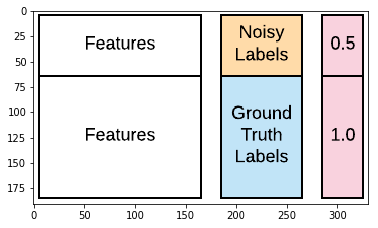

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('fig.PNG')
fig= plt.figure(figsize=(6,4))
plt.imshow(img)

In [0]:
X_train.head(5)

,average_duration,average_packet,unique_ports
source_computer,,,
C24626,0.000000,1.0,1
C22569,52.000000,18.0,1
C19246,62.000000,95.0,1
C9696,0.000000,1.0,1
C1074,23.714286,26.0,1


In [0]:
sum(y_test)

13

In [0]:
#@title
y_train_noisy = [True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

print('sum of y_train_noisy: ', sum(y_train_noisy))

sum of y_train_noisy:  118


In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
# Fit a Gaussian Naive Bayes classifier to the training data
clf = GaussianNB().fit(X_train, y_train_noisy)

In [0]:
# Report its accuracy on the test data
print(accuracy_score(y_test, clf.predict(X_test)))

0.14093959731543623


In [0]:
# Assign half the weight to the first 100 noisy examples
weights = [0.5]*100 + [1.0]*(len(y_train_noisy)-100)

In [0]:
# Refit using weights and report accuracy. Has it improved?
clf_weights = GaussianNB().fit(X_train, y_train_noisy, sample_weight=weights)
print(accuracy_score(y_test, clf_weights.predict(X_test)))

0.1476510067114094


#### Loss functions

- Recall = tp/(tp + fn) > **actual positive** = true positive + false negative


- precision = tp/(tp+fp) > **total predicted positive** = true positive + false positive

**Reminder of performance metrics**

Remember the credit dataset? With all the extra knowledge you now have about metrics, let's have another look at how good a random forest is on this dataset. You have already trained your classifier and obtained your confusion matrix on the test data. The test data and the results are available to you as tp, fp, fn and tn, for true positives, false positives, false negatives, and true negatives respectively. You also have the ground truth labels for the test data, y_test and the predicted labels, preds. The functions f1_score() and precision_score() have also been imported.

- Compute the F1 score for your classifier using the function f1_score().

In [0]:
tp = 155
fp = 23
fn = 48
tn = 24

In [0]:
from sklearn.metrics import f1_score, precision_score

In [0]:
print(f1_score(y_test, preds))

- Compute the precision for this classifier using the function precision_score().

In [0]:
print(precision_score(y_test, preds))

- Accuracy is the proportion of examples that were labelled correctly. Compute it without using accuracy_score().

In [0]:
print((tp + tn)/len(y_test))

**Real-world cost analysis**

You will still work on the credit dataset for this exercise. Recall that a "positive" in this dataset means "bad credit", i.e., a customer who defaulted on their loan, and a "negative" means a customer who continued to pay without problems. The bank manager informed you that the bank makes 10K profit on average from each "good risk" customer, but loses 150K from each "bad risk" customer. Your algorithm will be used to screen applicants, so those that are labeled as "negative" will be given a loan, and the "positive" ones will be turned down. What is the total cost of your classifier? The data is available as X_train, X_test, y_train and y_test. The functions confusion_matrix(), f1_score(), and precision_score() and RandomForestClassifier() are available.

In [0]:
# Fit a random forest classifier to the training data
clf = RandomForestClassifier(random_state=2).fit(X_train, y_train)

In [0]:
# Label the test data
preds = clf.predict(X_test)

- Extract the false negatives and false positives from confusion_matrix(). You will have to flatten the matrix.
- Falsely classifying a "good" customer as "bad" means that the bank would have lost the chance to make 10K profit. Falsely classifying a "bad" customer as "good" means that the bank would have lost 150K due to the customer defaulting on their loan.

In [0]:
# Get false positives/negatives from the confusion matrix
tp, fp, fn, tn = confusion_matrix(y_test, preds).ravel()

In [0]:
# Now compute the cost using the manager's advice
cost = fp*10 + fn*150

**Default thresholding**

You would like to confirm that the DecisionTreeClassifier() uses the same default classification threshold as mentioned in the previous lesson, namely 0.5. It seems strange to you that all classifiers should use the same threshold. Let's check! A fitted decision tree classifier clf has been preloaded for you, as have the training and test data with their usual names: X_train, X_test, y_train and y_test. You will have to extract probability scores from the classifier using the .predict_proba() method.

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = DecisionTreeClassifier()

- Produce scores for the test examples, using the preloaded classifier clf.

In [0]:
# Score the test data using the given classifier
scores = clf.predict_proba(X_test)

In [0]:
# Get labels from the scores using the default threshold
preds = [s[1] > 0.5 for s in scores]

In [0]:
# Use the predict method to label the test data again
preds_default = clf.predict(X_test)

In [0]:
# Compare the two sets of predictions
all(preds == preds_default)

**Optimizing the threshold**

You heard that the default value of 0.5 maximizes accuracy in theory, but you want to test what happens in practice. So you try out a number of different threshold values, to see what accuracy you get, and hence determine the best-performing threshold value. You repeat this experiment for the F1 score. Is 0.5 the optimal threshold? Is the optimal threshold for accuracy and for the F1 score the same? Go ahead and find out! You have a scores matrix available, obtained by scoring the test data. The ground truth labels for the test data is also available as y_test. Finally, two numpy functions are preloaded, argmin() and argmax(), which retrieve the index of the minimum and maximum values in an array respectively, in addition to the metrics accuracy_score() and f1_score().

In [0]:
# Create a range of equally spaced threshold values
t_range = [0.0, 0.25, 0.5, 0.75, 1.0]

- Via double list comprehension, store the predictions for each threshold value in the range above. Recall that obtaining labels for a scores matrix using a threshold thr is possible using [s[1] > thr for s in scores].

In [0]:
# Store the predicted labels for each value of the threshold
preds = [[s[1] > thr for s in scores] for thr in t_range]

In [0]:
# Compute the accuracy for each threshold
accuracies = [accuracy_score(y_test, p) for p in preds]

In [0]:
# Compute the F1 score for each threshold
f1_scores = [f1_score(y_test, p) for p in preds]

In [0]:
# Report the optimal threshold for accuracy, and for F1
print(t_range[argmax(accuracies)], t_range[argmax(f1_scores)])

**Bringing it all together**

One of the engineers in your arrhythmia detection startup rushes into your office to let you know that there is a problem with the ECG sensor for overweight users. You decide to reduce the influence of examples with weight over 80 by 50%. You are also told that since your startup is targeting the fitness market and makes no medical claims, scaring an athlete unnecessarily is costlier than missing a possible case of arrhythmia. You decide to create a custom loss that makes each "false alarm" ten times costlier than missing a case of arrhythmia. Does down-weighting overweight subjects improve this custom loss? Your training data X_train, y_train and test data X_test, y_test are preloaded, as are confusion_matrix(), numpy as np, and DecisionTreeClassifier().

- Start by creating a custom loss which extracts the false positives and false negatives from the confusion matrix, and then makes each false alarm count ten times as much as a missed case of arrhythmia.

In [0]:
# Create a scorer assigning more cost to false positives
def my_scorer(y_test, y_est, cost_fp=10.0, cost_fn=1.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

- Fit a DecisionTreeClassifier to the original data and estimate this loss.

In [0]:
# Fit a DecisionTreeClassifier to the data and compute the loss
clf = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)
print(my_scorer(y_test, clf.predict(X_test)))

- Create a list of weights so that each example where the weight is greater than 80 has half the weight of any other example. Does this improve your loss?


In [0]:
# Refit, downweighting subjects whose weight is above 80
weights = [0.5 if w > 80 else 1.0 for w in X_train.weight]
clf_weighted = DecisionTreeClassifier().fit(
  X_train, y_train, sample_weight=weights)
print(my_scorer(y_test, clf_weighted.predict(X_test)))

## 3. Model Lifecycle Management

In the previous chapter, you employed different ways of incorporating feedback from experts in your workflow, and evaluating it in ways that are aligned with business value. Now it is time for you to practice the skills needed to productize your model and ensure it continues to perform well thereafter by iteratively improving it. You will also learn to diagnose dataset shift and mitigate the effect that a changing environment can have on your model's accuracy.

In [0]:
arrh = pd.read_csv('arrh.csv')
print('data dimension: ', arrh.shape)
arrh.head(4)

data dimension:  (452, 280)


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,70,78,11,69,29,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,113,3,69,69,19,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,110,85,106,61,41,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,58,10,57,69,37,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1


In [0]:
#@title
tr_idx = [223,
 305,
 162,
 291,
 93,
 350,
 427,
 353,
 41,
 187,
 168,
 95,
 106,
 405,
 92,
 122,
 23,
 13,
 61,
 271,
 39,
 285,
 409,
 346,
 98,
 410,
 411,
 337,
 258,
 224,
 127,
 82,
 428,
 345,
 27,
 89,
 349,
 73,
 69,
 186,
 91,
 201,
 289,
 339,
 125,
 423,
 59,
 120,
 12,
 347,
 214,
 451,
 213,
 157,
 304,
 236,
 373,
 366,
 179,
 403,
 310,
 88,
 131,
 124,
 174,
 283,
 14,
 375,
 315,
 123,
 138,
 111,
 51,
 112,
 9,
 242,
 16,
 365,
 0,
 314,
 105,
 247,
 359,
 436,
 270,
 382,
 70,
 447,
 38,
 150,
 268,
 163,
 167,
 225,
 206,
 233,
 434,
 425,
 145,
 245,
 312,
 325,
 42,
 160,
 364,
 250,
 275,
 256,
 444,
 340,
 391,
 354,
 430,
 251,
 378,
 147,
 260,
 228,
 100,
 34,
 188,
 110,
 175,
 53,
 227,
 135,
 421,
 450,
 154,
 19,
 142,
 363,
 158,
 309,
 44,
 307,
 277,
 113,
 287,
 211,
 108,
 388,
 169,
 79,
 426,
 84,
 8,
 32,
 99,
 392,
 370,
 222,
 28,
 331,
 55,
 429,
 351,
 48,
 372,
 318,
 33,
 35,
 63,
 327,
 234,
 442,
 45,
 177,
 219,
 343,
 21,
 248,
 199,
 137,
 24,
 184,
 205,
 134,
 116,
 212,
 407,
 386,
 300,
 231,
 217,
 56,
 355,
 330,
 328,
 181,
 97,
 114,
 278,
 118,
 338,
 170,
 389,
 54,
 176,
 194,
 198,
 182,
 368,
 103,
 220,
 130,
 326,
 60,
 94,
 193,
 140,
 148,
 202,
 152,
 385,
 10,
 269,
 96,
 210,
 240,
 57,
 301,
 344,
 36,
 404,
 20,
 397,
 332,
 75,
 200,
 77,
 263,
 445,
 149,
 449,
 2,
 52,
 262,
 253,
 259,
 333,
 321,
 183,
 151,
 408,
 302,
 190,
 74,
 348,
 243,
 437,
 87,
 239,
 143,
 376,
 266,
 288,
 136,
 166,
 83,
 400,
 155,
 356,
 279,
 126,
 195,
 265,
 415,
 104,
 153,
 282,
 226,
 367,
 25,
 196,
 64,
 15,
 297,
 371,
 109,
 336,
 308,
 26,
 76,
 43,
 280,
 3,
 414,
 49,
 387,
 440,
 30,
 121,
 115,
 420,
 216,
 264,
 209,
 316,
 384,
 1,
 313,
 22,
 317,
 319,
 7,
 446,
 141,
 86,
 352,
 241,
 215,
 68,
 50,
 398,
 413,
 156,
 252,
 395,
 402,
 357,
 254,
 276,
 178,
 281,
 390,
 237,
 71,
 129,
 144,
 335,
 133,
 203,
 393,
 255,
 72,
 396,
 235,
 37]
print('train index dimension: ', len(tr_idx))
tr_idx[:5]

train index dimension:  339


[223, 305, 162, 291, 93]

In [0]:
#@title
test_idx = [207,
 383,
 65,
 197,
 208,
 435,
 246,
 399,
 173,
 298,
 238,
 159,
 4,
 358,
 342,
 185,
 232,
 47,
 102,
 412,
 295,
 146,
 284,
 67,
 66,
 294,
 31,
 62,
 5,
 165,
 128,
 320,
 334,
 17,
 161,
 299,
 369,
 132,
 441,
 90,
 422,
 267,
 119,
 180,
 362,
 29,
 221,
 360,
 406,
 418,
 107,
 192,
 329,
 257,
 439,
 443,
 204,
 374,
 311,
 438,
 324,
 290,
 273,
 172,
 191,
 401,
 229,
 296,
 381,
 171,
 6,
 380,
 417,
 164,
 306,
 416,
 432,
 431,
 424,
 58,
 341,
 78,
 261,
 394,
 303,
 244,
 292,
 18,
 40,
 286,
 139,
 272,
 101,
 379,
 448,
 230,
 80,
 46,
 249,
 117,
 85,
 361,
 81,
 377,
 274,
 433,
 293,
 218,
 323,
 189,
 419,
 322,
 11]
print('test index dimenstion: ', len(test_idx))
test_idx[:5]

test index dimenstion:  113


[207, 383, 65, 197, 208]

In [0]:
data_arrh = arrh[:].astype(np.float64)
y = data_arrh['class']
del data_arrh['class']
X = data_arrh

In [0]:
X_train = X.loc[tr_idx]
y_train = y.loc[tr_idx]
X_test = X.loc[test_idx]
y_test = y.loc[test_idx]

In [0]:
# sanity check
X_test[:5]

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
207,62.0,0.0,176.0,73.0,146.0,138.0,438.0,283.0,87.0,16.0,92.0,13.0,66.0,18.0,30.0,0.0,136.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,132.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,4.8,0.0,2.7,-25.2,0.0,0.0,-0.3,8.7,-117.2,15.0,1.9,0.0,2.1,-11.4,0.0,0.0,0.3,4.8,-39.1,29.0,-0.9,0.0,7.5,0.0,0.0,0.0,0.1,2.3,51.0,83.6,-1.8,0.0,10.3,0.0,0.0,0.0,0.1,-1.6,67.9,45.2
383,47.0,0.0,169.0,80.0,89.0,142.0,369.0,155.0,91.0,5.0,14.0,57.0,21.0,69.0,31.0,20.0,40.0,36.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,36.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,14.5,-8.4,0.0,0.0,0.2,3.8,20.9,55.8,-0.2,0.0,13.8,-5.6,0.0,0.0,0.8,2.0,20.8,37.6,-0.3,-0.4,11.9,-2.3,0.0,0.0,0.7,1.6,21.2,34.6,-0.3,-0.5,9.4,0.0,0.0,0.0,0.7,1.4,22.0,32.9
65,44.0,1.0,155.0,65.0,80.0,117.0,363.0,142.0,72.0,56.0,50.0,76.0,69.0,69.0,39.0,0.0,60.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.9,-6.1,0.0,0.0,0.1,2.5,-7.6,12.9,-0.1,0.0,7.0,-3.6,0.0,0.0,0.5,2.2,7.5,25.9,-0.1,0.0,6.8,-1.3,0.0,0.0,0.6,1.6,11.0,24.4,-0.2,0.0,6.2,0.0,0.0,0.0,0.5,1.1,16.1,23.8
197,46.0,0.0,168.0,60.0,100.0,185.0,413.0,147.0,93.0,-12.0,74.0,71.0,35.0,69.0,19.0,24.0,44.0,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,56.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.3,-0.5,15.9,-5.6,0.0,0.0,0.4,4.8,26.5,65.8,-1.1,-1.0,29.7,-5.3,0.0,0.0,0.7,3.8,59.6,84.6,-0.7,-0.9,19.7,-3.1,0.0,0.0,0.5,2.8,40.1,57.4,-0.4,-0.5,11.1,-1.8,0.0,0.0,0.5,1.7,22.5,32.7
208,42.0,1.0,157.0,65.0,86.0,109.0,374.0,167.0,61.0,66.0,87.0,49.0,94.0,6.0,30.0,0.0,56.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,52.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.9,0.0,7.1,-8.6,0.0,0.0,0.5,6.6,-8.1,53.9,-0.9,0.0,13.4,-4.1,0.0,0.0,0.6,4.7,32.9,71.4,-1.3,0.0,19.9,-2.9,0.0,0.0,0.5,3.1,46.5,75.0,-1.4,-0.4,17.3,0.0,0.0,0.0,0.5,2.5,41.2,64.2


#### From workflows to pipelines

**Your first pipeline - again!**

Back in the arrhythmia startup, your monthly review is coming up, and as part of that an expert Python programmer will be reviewing your code. You decide to tidy up by following best practices and replace your script for feature selection and random forest classification, with a pipeline. You are using a training dataset available as X_train and y_train, and a number of modules: RandomForestClassifier, SelectKBest() and f_classif() for feature selection, as well as GridSearchCV and Pipeline.

- Create a pipeline with the feature selector given by the sample code, and a random forest classifier. Name the first step feature_selection.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif

In [0]:
# Create pipeline with feature selector and classifier
pipe = Pipeline([
    ('feature_selection', SelectKBest(f_classif)),
    ('clf', RandomForestClassifier(random_state=2))])

- Add two key-value pairs in params, one for the number of features k in the selector with values 10 and 20, and one for n_estimators in the forest with possible values 2 and 5.

In [0]:
# Create a parameter grid
params = {
   'feature_selection__k':[10,20],
    'clf__n_estimators':[2, 5]}

In [0]:
# Initialize the grid search object
grid_search = GridSearchCV(pipe, param_grid=params)

In [0]:
# Fit it to the data and print the best value combination
print(grid_search.fit(X_train, y_train).best_params_)

{'clf__n_estimators': 5, 'feature_selection__k': 20}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  24  26  35  36  47  58  67  69  71  72  81  83  85 121 131 132 139
 141 142 143 144 145 151 153 154 155 156 157 164 204 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  55  60  67  69  72  81  83  86 127 131 132 139 141 143 144 145 151
 153 154 156 157 164 194 204 254 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklea

**Custom scorers in pipelines**

You are proud of the improvement in your code quality, but just remembered that previously you had to use a custom scoring metric in order to account for the fact that false positives are costlier to your startup than false negatives. You hence want to equip your pipeline with scorers other than accuracy, including roc_auc_score(), f1_score(), and you own custom scoring function. The pipeline from the previous lesson is available as pipe, as is the parameter grid as params and the training data as X_train, y_train. You also have confusion_matrix() for the purpose of writing your own metric.

- Convert the metric roc_auc_score() into a scorer, and feed it into GridSearchCV(). Then fit that to the data.

In [0]:
from sklearn.metrics import make_scorer, roc_auc_score

In [0]:
# Create a custom scorer
scorer = make_scorer(roc_auc_score)

In [0]:
# Initialize the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer)

In [0]:
# Fit it to the data and print the winning combination
print(gs.fit(X_train, y_train).best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  24  26  35  36  47  58  67  69  71  72  81  83  85 121 131 132 139
 141 142 143 144 145 151 153 154 155 156 157 164 204 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  55  60  67  69  72  81  83  86 127 131 132 139 141 143 144 145 151
 153 154 156 157 164 194 204 254 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklea

{'clf__n_estimators': 5, 'feature_selection__k': 20}


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  21  25  45  67  69  72  74  81  83  84 115 119 129 131 132 133 139
 141 143 144 145 146 151 153 154 156 157 164 204 244 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  67  69  72  81  83 131 132 139 141 143 144 145 151 153 154 156 157
 164 204 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


- Now repeat for the F1 score, instead, given by f1_score().

In [0]:
# Create a custom scorer
scorer = make_scorer(f1_score)

# Initialise the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer)

# Fit it to the data and print the winning combination
print(gs.fit(X_train, y_train).best_params_)

- Now repeat with a custom metric which is available to you as as simple Python function called my_metric().

In [0]:
# Create a custom scorer
scorer = make_scorer(my_metric)

# Initialise the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer)

# Fit it to the data and print the winning combination
print(gs.fit(X_train, y_train).best_params_)

#### Model deployment

**Pickles**

Finally, it is time for you to push your first model to production. It is a random forest classifier which you will use as a baseline, while you are still working to develop a better alternative. You have access to the data split in training test with their usual names, X_train, X_test, y_train and y_test, as well as to the modules RandomForestClassifier() and pickle, whose methods .load() and .dump() you will need for this exercise.

- Fit a random forest classifier to the data. Fix the random seed to 42 ensure that your results are reproducible.

In [0]:
# Fit a random forest to the training set
clf = RandomForestClassifier(random_state=42).fit(
  X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
import pickle

- Write the model to file using pickle. Open the destination file using the with open(_ _ _ _) as _ _ _ _ syntax.

In [0]:
# Save it to a file, to be pushed to production
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file=file)

- Now load the model from file into a different variable name, clf_from_file.

In [0]:
# Now load the model from file in the production environment
with open('model.pkl', 'rb') as file:
    clf_from_file = pickle.load(file)

- Store the predictions from the model you loaded into a variable preds.

In [0]:
# Predict the labels of the test dataset
preds = clf_from_file.predict(X_test)

In [0]:
preds[:5]

array([0., 1., 1., 0., 1.])

**Custom function transformers in pipelines**

At some point, you were told that the sensors might be performing poorly for obese individuals. Previously you had dealt with that using weights, but now you are thinking that this information might also be useful for feature engineering, so you decide to replace the recorded weight of an individual with an indicator of whether they are obese. You want to do this using pipelines. You have numpy available as np, RandomForestClassifier(), FunctionTransformer(), and GridSearchCV().

- Define a custom feature extractor. This is a function that will output a modified copy of its input.
- Replace each value of the first column with the indicator of whether that value is above a threshold given by a multiple of the column mean.
- Convert the feature extractor above to a transformer and place it in a pipeline together with a random forest classifier.
- Use grid search CV to try values 1, 2 and 3 for the multiplication constant multiplier in your feature extractor.

In [0]:
from sklearn.preprocessing import FunctionTransformer

In [0]:
# Define a feature extractor to flag very large values
def more_than_average(X, multiplier=1.0):
  Z = X.copy()
  Z[:,1] = Z[:,1] > multiplier*np.mean(Z[:,1])
  return Z

In [0]:
# Convert your function so that it can be used in a pipeline
pipe = Pipeline([
  ('ft', FunctionTransformer(more_than_average)),
  ('clf', RandomForestClassifier(random_state=2))])

In [0]:
# Optimize the parameter multiplier using GridSearchCV
params = {'ft__multiplier': [1, 2, 3]}
grid_search = GridSearchCV(pipe, param_grid=params)

#### Iterating without overfitting

**Challenge the champion**

Having pushed your random forest to production, you suddenly worry that a naive Bayes classifier might be better. You want to run a champion-challenger test, by comparing a naive Bayes, acting as the challenger, to exactly the model which is currently in production, which you will load from file to make sure there is no confusion. You will use the F1 score for assessment. You have the data X_train, X_test, y_train and y_test available as before and GaussianNB(), f1_score() and pickle().

In [0]:
# Load the current model from disk
champion = pickle.load(open('model.pkl', 'rb'))

In [0]:
# Fit a Gaussian Naive Bayes to the training data
challenger = GaussianNB().fit(X_train, y_train)

- Print the F1 score of the champion and then the challenger on the test data.

In [0]:
# Print the F1 test scores of both champion and challenger
print(f1_score(y_test, champion.predict(X_test)))
print(f1_score(y_test, challenger.predict(X_test)))

0.8548387096774194
0.811188811188811


- Overwrite the current model to disk with the one that performed best.

In [0]:
# Write back to disk the best-performing model
with open('model.pkl', 'wb') as file:
    pickle.dump(champion, file=file)

**Cross-validation statistics**

You used grid search CV to tune your random forest classifier, and now want to inspect the cross-validation results to ensure you did not overfit. In particular you would like to take the difference of the mean test score for each fold from the mean training score. The dataset is available as X_train and y_train, the pipeline as pipe, and a number of modules are pre-loaded including pandas as pd and GridSearchCV().

In [0]:
# Create pipeline with feature selector and classifier
pipe = Pipeline([
    ('feature_selection', SelectKBest(f_classif)),
    ('clf', RandomForestClassifier(random_state=2))])
# from previous parts
params = {
   'feature_selection__k':[10,20],
    'clf__n_estimators':[2, 5]}

In [0]:
# Fit your pipeline using GridSearchCV with three folds
grid_search = GridSearchCV(
  pipe, params, cv=3, return_train_score=True)

In [0]:
# Fit the grid search
gs = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  24  26  35  36  47  58  67  69  71  72  81  83  85 121 131 132 139
 141 142 143 144 145 151 153 154 155 156 157 164 204 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  55  60  67  69  72  81  83  86 127 131 132 139 141 143 144 145 151
 153 154 156 157 164 194 204 254 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  21  

In [0]:
# Store the results of CV into a pandas dataframe
results = pd.DataFrame(gs.cv_results_)

In [0]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,param_feature_selection__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010441,0.002108,0.001820,0.000045,2,10,"{'clf__n_estimators': 2, 'feature_selection__k...",0.601770,0.619469,0.601770,0.607670,0.008343,3,0.836283,0.823009,0.867257,0.842183,0.018540
1,0.008797,0.000184,0.001794,0.000022,2,20,"{'clf__n_estimators': 2, 'feature_selection__k...",0.654867,0.530973,0.601770,0.595870,0.050751,4,0.849558,0.836283,0.840708,0.842183,0.005519
2,0.011494,0.000109,0.002214,0.000110,5,10,"{'clf__n_estimators': 5, 'feature_selection__k...",0.610619,0.672566,0.654867,0.646018,0.026052,2,0.960177,0.955752,0.946903,0.954277,0.005519
3,0.011687,0.000209,0.002054,0.000055,5,20,"{'clf__n_estimators': 5, 'feature_selection__k...",0.707965,0.699115,0.690265,0.699115,0.007226,1,0.960177,0.977876,0.955752,0.964602,0.009559


In [0]:
# Print the difference between mean test and training scores
print(
  results['mean_test_score']-results['mean_train_score'])

0   -0.234513
1   -0.246313
2   -0.308260
3   -0.265487
dtype: float64


#### Dataset shift

In [0]:
#@title
idx_test = [195,
 416,
 419,
 154,
 353,
 321,
 67,
 125,
 407,
 165,
 94,
 118,
 53,
 163,
 188,
 232,
 405,
 196,
 446,
 434,
 346,
 86,
 167,
 334,
 102,
 181,
 146,
 211,
 149,
 216,
 108,
 393,
 250,
 374,
 305,
 5,
 198,
 298,
 430,
 432,
 210,
 113,
 401,
 379,
 429,
 297,
 424,
 403,
 320,
 141,
 60,
 316]

print('length of idx_test: ', len(idx_test))

length of idx_test:  52


**Tuning the window size**

You want to check for yourself that the optimal window size for the arrhythmia dataset is 50. You have been given the dataset as a pandas data frame called arrh, and want to use a subset of the data up to time t_now. Your test data is available as X_test, y_test. You will try out a number of window sizes, ranging from 10 to 100, fit a naive Bayes classifier to each window, assess its F1 score on the test data, and then pick the best performing window size. You also have numpy available as np, and the function f1_score() has been imported already. Finally, an empty list called accuracies has been initialized for you to store the accuracies of the windows.

- Define the index of a sliding window of size w_size stopping at t_now using the .loc() method.
- Construct X from the sliding window by removing the class column. Store that latter column as y.
- Fit a naive Bayes classifier to X and y, and use it to predict the labels of the test data X_test.
- Compute the F1 score of these predictions for each window size, and find the best-performing window size.

In [0]:
t_now = 400

Index(['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS',
       ...
       'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp',
       'chV6_SPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA',
       'chV6_QRSTA', 'class'],
      dtype='object', length=280)

In [0]:
# Loop over window sizes
for w_size in wrange:

    # Define sliding window
    sliding = arrh.loc[t_now-w_size+1:t_now]

    # Extract X and y from the sliding window
    X, y = sliding.drop('class', 1), sliding['class']
    
    # Fit the classifier and store the F1 score
    preds = GaussianNB().fit(X, y).predict(X_test)
    accuracies.append(f1_score(y_test, preds))

In [0]:
# Estimate the best performing window size
optimal_window = wrange[np.argmax(accuracies)]

**Bringing it all together**

You have two concerns about your pipeline at the arrhythmia detection startup:

- The app was trained on patients of all ages, but is primarily being used by fitness users who tend to be young. You suspect this might be a case of domain shift, and hence want to disregard all examples above 50 years old.
- You are still concerned about overfitting, so you want to see if making the random forest classifier less complex and selecting some features might help with that.

You will create a pipeline with a feature selection SelectKBest() step and a RandomForestClassifier, both of which have been imported. You also have access to GridSearchCV(), Pipeline, numpy as np and pickle. The data is available as arrh.

- Create a pipeline with SelectKBest() as step ft and RandomForestClassifier() as step clf.
- Create a parameter grid to tune k in SelectKBest() and max_depth in RandomForestClassifier().
- Use GridSearchCV() to optimize your pipeline against that grid and data containing only those aged under 50.
- Save the optimized pipeline to a pickle for production.

In [0]:
# Create a pipeline 
pipe = Pipeline([
  ('ft', SelectKBest()), ('clf', RandomForestClassifier(random_state=2))])

In [0]:
# Create a parameter grid
grid = {'ft__k':[5, 10], 'clf__max_depth':[10, 20]}

In [0]:
# Execute grid search CV on a dataset containing under 50s
grid_search = GridSearchCV(pipe, param_grid=grid)
arrh = arrh.iloc[np.where(arrh['age'] < 50)]
grid_search.fit(arrh.drop('class', 1), arrh['class'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 19  21  22  24  25  31  35  36  37  49  55  59  61  62  67  69  71  72
  74  83  84  85  86 121 131 132 133 139 141 142 143 144 145 151 154 156
 157 158 164 174 194 204 264 274] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-pa

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ft',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x7fbb0626d510>)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               

In [0]:
# Push the fitted pipeline to production
with open('pipe.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

## 4. Unsupervised Workflows

In the previous chapters you established a solid foundation in supervised learning, complete with knowledge of deploying models in production but always assumed you a labeled dataset would be available for your analysis. In this chapter, you take on the challenge of modeling data without any, or with very few, labels. This takes you into a journey into anomaly detection, a kind of unsupervised modeling, as well as distance-based learning, where beliefs about what constitutes similarity between two examples can be used in place of labels to help you achieve levels of accuracy comparable to a supervised workflow. Upon completing this chapter, you will clearly stand out from the crowd of data scientists in confidently knowing what tools to use to modify your workflow in order to overcome common real-world challenges.

#### Anomaly detection

**A simple outlier**

When you first encounter a new type of algorithm, it is always a great idea to test it with a very simple example. So you decide to create a list containing thirty examples with the value 1.0 and just one example with value 10.0, which you expect should be flagged as an outlier. To make sure you use the algorithm correctly, you convert the list to a pandas dataframe, and feed it into the local outlier factor algorithm. pandas is available to you as pd.

In [0]:
# Import the LocalOutlierFactor module
from sklearn.neighbors import LocalOutlierFactor as lof

In [0]:
# Create the list [1.0, 1.0, ..., 1.0, 10.0] as explained
x = [1.0]*30
x.append(10)

In [0]:
# Cast to a data frame
X = pd.DataFrame(x)

In [0]:
# Fit the local outlier factor and print the outlier scores
print(lof().fit_predict(X))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1]


/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


**LoF contamination**

Your medical advisor at the arrhythmia startup informs you that your training data might not contain all possible types of arrhythmia. How on earth will you detect these other types without any labeled examples? Could an anomaly detector tell the difference between healthy and unhealthy without access to labels? But first, you experiment with the contamination parameter to see its effect on the confusion matrix. You have LocalOutlierFactor as lof, numpy as np, the labels as ground_truth encoded in -1and 1 just like local outlier factor output, and the unlabeled training data as X.


In [0]:
arrh = pd.read_csv('arrh.csv')
print('data dimension: ', arrh.shape)
arrh.head(4)

data dimension:  (452, 280)


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,70,78,11,69,29,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,113,3,69,69,19,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,110,85,106,61,41,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,58,10,57,69,37,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1


In [0]:
truth = arrh[['class']][:]
truth.loc[truth['class']==0] = -1

In [0]:
# sanity check
ground_truth = truth['class'].astype('float')
ground_truth[:5]

In [0]:
X = arrh.iloc[:, :-1]
print('dimension of X: ', X.shape) # (452, 279)
X.head(5)

dimension of X:  (452, 279)


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,75,0,190,80,91,193,371,174,121,-16,70,78,11,69,29,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,113,3,69,69,19,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,110,85,106,61,41,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,58,10,57,69,37,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.7,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,70,75,67,69,63,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,-0.5,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [0]:
from sklearn.metrics import confusion_matrix

1. Fit a local outlier factor and output the predictions on X and print the confusion matrix for these predictions.

In [0]:
# Fit the local outlier factor and output predictions
preds = lof().fit_predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [0]:
# Print the confusion matrix
print(confusion_matrix(ground_truth, preds))

[[ 40 167]
 [  6 239]]


2. Repeat but now set the proportion of datapoints to be flagged as outliers to 0.2. Print the confusion matrix.

In [0]:
# Set the contamination parameter to 0.2
preds = lof(contamination=0.2).fit_predict(X)

In [0]:
# Print the confusion matrix
print(confusion_matrix(ground_truth, preds))

[[ 72 135]
 [ 19 226]]


3. Now set the contamination to be equal to the actual proportion of outliers in the data.

In [0]:
# Contamination to match outlier frequency in ground_truth
preds = lo# Print the confusion matrix
print(confusion_matrix(ground_truth, preds))f(
  contamination=np.mean(ground_truth==-1.0)).fit_predict(X)

In [0]:
# Print the confusion matrix
print(confusion_matrix(ground_truth, preds))

[[141  66]
 [ 66 179]]


#### Novelty detection

**A simple novelty**

You find novelty detection more useful than outlier detection, but want to make sure it works on the simple example you came up with before. This time you will use a sequence of thirty examples all with value 1.0 as a training set, and try to see if the example 10.0 is labeled as a novelty. You have access to pandas as pd, and the LocalOutlierFactor module as lof.

- Create a pandas DataFrame containing thirty examples all equal to 1.0.

In [0]:
# Create a list of thirty 1s and cast to a dataframe
X = pd.DataFrame([1.0]*30)

- Initialize a local outlier factor novelty detector.
- Fit the detector to the training data.

In [0]:
# Create an instance of a lof novelty detector
detector = lof(novelty=True)

In [0]:
# Fit the detector to the data
detector.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

- Output the novelty label of the datapoint 10.0, casted to a DataFrame.

In [0]:
# Use it to predict the label of an example with value 10.0
print(detector.predict(pd.DataFrame([10.0])))

[-1]


Great, you are now reassured that you understand the method correctly: 10.0 is labelled as -1, which means it is considered novel.

In [0]:
#@title
train_idx = [131,
 389,
 286,
 16,
 418,
 445,
 322,
 3,
 18,
 172,
 60,
 220,
 229,
 173,
 63,
 110,
 285,
 222,
 29,
 148,
 265,
 26,
 7,
 411,
 108,
 231,
 422,
 118,
 114,
 193,
 175,
 334,
 349,
 155,
 412,
 403,
 141,
 440,
 237,
 351,
 199,
 109,
 438,
 145,
 357,
 152,
 176,
 225,
 83,
 391,
 410,
 195,
 74,
 250,
 294,
 203,
 119,
 421,
 268,
 395,
 407,
 181,
 208,
 376,
 347,
 238,
 36,
 139,
 329,
 321,
 255,
 318,
 59,
 111,
 210,
 249,
 6,
 325,
 311,
 158,
 150,
 177,
 184,
 10,
 247,
 103,
 81,
 38,
 314,
 167,
 424,
 262,
 198,
 266,
 367,
 211,
 194,
 89,
 246,
 163,
 253,
 147,
 2,
 92,
 362,
 69,
 431,
 123,
 333,
 96,
 143,
 342,
 323,
 239,
 97,
 277,
 68,
 23,
 37,
 144,
 122,
 183,
 202,
 182,
 67,
 307,
 274,
 331,
 316,
 371,
 382,
 397,
 125,
 146,
 393,
 271,
 223,
 228,
 86,
 380,
 219,
 129,
 381,
 378,
 364,
 341,
 261,
 320,
 399,
 405,
 112,
 179,
 425,
 305,
 296,
 450,
 324,
 233,
 358,
 164,
 136,
 197,
 258,
 232,
 115,
 120,
 224,
 365,
 369,
 127,
 374,
 107,
 335,
 449,
 133,
 402,
 44,
 416,
 65,
 283,
 85,
 242,
 186,
 159,
 12,
 35,
 28,
 170,
 142,
 361,
 432,
 221,
 95,
 51,
 240,
 360,
 346,
 178,
 41,
 352,
 206,
 282,
 254,
 375,
 4,
 256,
 406,
 100,
 226,
 386,
 213,
 171,
 98,
 292,
 215,
 61,
 47,
 32,
 267,
 327,
 200,
 404,
 27,
 354,
 230,
 260,
 288,
 162,
 384,
 138,
 62,
 135,
 128,
 430,
 8,
 326,
 419,
 64,
 300,
 14,
 156,
 40,
 415,
 388,
 216,
 279,
 392,
 337,
 236,
 207,
 212,
 295,
 429,
 251,
 441,
 414,
 303,
 350,
 269,
 201,
 161,
 43,
 217,
 190,
 309,
 259,
 105,
 53,
 1,
 436,
 49,
 80,
 205,
 34,
 263,
 366,
 91,
 339,
 427,
 52,
 345,
 264,
 241,
 13,
 315,
 88,
 387,
 273,
 166,
 328,
 444,
 134,
 306,
 434,
 319,
 243,
 54,
 363,
 50,
 174,
 189,
 448,
 187,
 169,
 58,
 48,
 344,
 235,
 252,
 21,
 313,
 160,
 276,
 191,
 385,
 293,
 413,
 343,
 257,
 308,
 149,
 130,
 151,
 359,
 99,
 372,
 87,
 330,
 214,
 121,
 451,
 20,
 188,
 71,
 106,
 270,
 348,
 435,
 102]
print('train index dimension: ', len(train_idx))
train_idx[:5]

train index dimension:  339


[131, 389, 286, 16, 418]

In [0]:
#@title
test_ind = [299,
 39,
 336,
 332,
 153,
 196,
 290,
 101,
 398,
 30,
 72,
 165,
 140,
 370,
 355,
 55,
 401,
 227,
 390,
 82,
 77,
 132,
 248,
 117,
 204,
 218,
 79,
 442,
 9,
 340,
 379,
 245,
 417,
 113,
 446,
 76,
 278,
 317,
 124,
 78,
 284,
 90,
 302,
 73,
 420,
 75,
 70,
 180,
 409,
 428,
 275,
 33,
 244,
 312,
 373,
 400,
 11,
 396,
 15,
 439,
 353,
 0,
 19,
 289,
 298,
 56,
 280,
 338,
 297,
 423,
 433,
 383,
 25,
 426,
 304,
 368,
 42,
 209,
 443,
 116,
 234,
 287,
 291,
 22,
 46,
 437,
 447,
 137,
 93,
 57,
 192,
 24,
 17,
 66,
 301,
 356,
 31,
 84,
 377,
 126,
 185,
 154,
 94,
 408,
 168,
 272,
 281,
 394,
 104,
 310,
 5,
 45,
 157]

print('test index dimenstion: ', len(test_ind))
test_ind[:5]

test index dimenstion:  113


[299, 39, 336, 332, 153]

In [0]:
data_arrh = arrh[:].astype(np.float64)
y = ground_truth
del data_arrh['class']
X = data_arrh

In [0]:
X_train = X.loc[train_idx]
y_train = y.loc[train_idx]
X_test = X.loc[test_ind]
y_test = y.loc[test_ind]

In [0]:
# sanity check
X_train[:5]

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,P,QRST,J,heartrate,chDI_Qwave,chDI_Rwave,chDI_Swave,chDI_RPwave,chDI_SPwave,chDI_intrinsicReflecttions,chDI_RRwaveExists,chDI_DD_RRwaveExists,chDI_RPwaveExists,chDI_DD_RPwaveExists,chDI_RTwaveExists,chDI_DD_RTwaveExists,chDII_Qwave,chDII_Rwave,chDII_Swave,chDII_RPwave,chDII_SPwave,chDII_intrinsicReflecttions,chDII_RRwaveExists,chDII_DD_RRwaveExists,chDII_RPwaveExists,chDII_DD_RPwaveExists,chDII_RTwaveExists,chDII_DD_RTwaveExists,chDIII_Qwave,...,chV3_JJwaveAmp,chV3_QwaveAmp,chV3_RwaveAmp,chV3_SwaveAmp,chV3_RPwaveAmp,chV3_SPwaveAmp,chV3_PwaveAmp,chV3_TwaveAmp,chV3_QRSA,chV3_QRSTA,chV4_JJwaveAmp,chV4_QwaveAmp,chV4_RwaveAmp,chV4_SwaveAmp,chV4_RPwaveAmp,chV4_SPwaveAmp,chV4_PwaveAmp,chV4_TwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_RwaveAmp,chV5_SwaveAmp,chV5_RPwaveAmp,chV5_SPwaveAmp,chV5_PwaveAmp,chV5_TwaveAmp,chV5_QRSA,chV5_QRSTA,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
131,48.0,1.0,165.0,70.0,83.0,146.0,418.0,134.0,83.0,48.0,121.0,53.0,86.0,69.0,27.0,0.0,48.0,20.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,16.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,...,-0.2,0.0,7.1,-7.6,0.0,0.0,1.1,2.4,4.9,26.0,-1.1,0.0,14.8,-5.7,0.0,0.0,1.2,1.3,27.0,34.5,-0.7,0.0,13.7,-2.7,0.0,0.0,0.9,0.4,30.8,33.6,-1.0,0.0,11.9,0.0,0.0,0.0,1.0,0.6,28.5,31.7
389,70.0,0.0,178.0,80.0,93.0,118.0,258.0,155.0,82.0,-31.0,81.0,5.0,18.0,44.0,57.0,0.0,72.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,16.0,12.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,...,-0.5,0.0,7.0,-7.9,0.0,0.0,0.3,1.3,-5.3,2.2,-0.4,0.0,6.9,-7.3,0.0,0.0,0.1,-0.8,-5.4,-10.3,-1.3,0.0,13.8,-5.2,0.0,0.0,0.3,-1.1,22.3,13.8,-1.5,0.0,15.7,-2.1,0.0,0.0,0.5,-1.3,32.6,22.5
286,33.0,1.0,160.0,69.0,83.0,174.0,381.0,125.0,83.0,69.0,99.0,60.0,99.0,69.0,39.0,0.0,56.0,28.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,56.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.7,0.0,6.0,-7.0,0.0,0.0,0.3,3.2,1.8,31.2,0.0,0.0,12.4,-3.0,0.0,0.0,0.5,0.9,24.3,30.4,-0.2,0.0,13.9,-1.4,0.0,0.0,0.5,1.0,33.9,39.9,-0.2,0.0,12.3,0.0,0.0,0.0,0.4,1.1,34.4,41.2
16,47.0,0.0,171.0,59.0,82.0,145.0,347.0,169.0,61.0,77.0,153.0,92.0,116.0,69.0,33.0,0.0,48.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,36.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,0.0,1.4,-11.8,0.0,0.0,0.4,4.4,-29.0,10.6,0.1,0.0,7.6,-3.4,0.0,0.0,0.4,4.7,16.5,60.6,-0.5,0.0,11.5,-2.6,0.0,0.0,0.4,2.8,25.3,47.1,-0.4,0.0,9.4,-1.7,0.0,0.0,0.6,2.3,19.5,41.1
418,50.0,1.0,163.0,65.0,75.0,151.0,362.0,137.0,93.0,43.0,109.0,62.0,76.0,69.0,34.0,20.0,56.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,40.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,5.8,-8.5,0.0,0.0,0.5,1.4,-5.4,6.6,-0.1,0.0,5.4,-4.7,0.0,0.0,0.6,0.4,-0.4,1.6,-0.2,0.0,5.4,-2.9,0.0,0.0,0.7,0.9,2.8,8.0,-0.3,-0.4,5.1,-1.3,0.0,0.0,0.7,1.0,6.2,11.6


In [0]:
# sanity check
y_train[:5]

131    1.0
389    1.0
286    1.0
16    -1.0
418    1.0
Name: class, dtype: float64

**Three novelty detectors**

Finally, you know enough to run some tests on the use of a few anomaly detectors on the arrhythmia dataset. To test their performance, you will train them on an unlabeled training dataset, but then compare their predictions to the ground truth on the test data using their method `.score_samples()`. This time, you will be asked to import the detectors as part of the exercise, but you do have the data `X_train, X_test, y_train, y_test` preloaded as usual.

1. Import the one-class SVM detector from the svm module as onesvm, fit it to the training data, and score the test data.

In [0]:
# Import the novelty detector
from sklearn.svm import OneClassSVM as onesvm

In [0]:
# Fit it to the training data and score the test data
svm_detector = onesvm().fit(X_train)
scores = svm_detector.score_samples(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


2. Adapt your code to import the isolation forest from the ensemble module as isof, fit it and score the test data.

In [0]:
# Import the novelty detector
from sklearn.ensemble import IsolationForest as isof

In [0]:
# Fit it to the training data and score the test data
isoforest = isof().fit(X_train)
scores = isoforest.score_samples(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


3. Adapt your code to import the LocalOutlierFactor module as lof, fit it to the training data, and score the test data.

In [0]:
# Import the novelty detector
from sklearn.neighbors import LocalOutlierFactor as lof

In [0]:
# Fit it to the training data and score the test data
lof_detector = lof(novelty=True).fit(X_train)
scores = lof_detector.score_samples(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


**Contamination revisited**

You notice that one-class SVM does not have a contamination parameter. But you know well by now that you really need a way to control the proportion of examples that are labeled as novelties in order to control your false positive rate. So you decide to experiment with thresholding the scores. The detector has been imported as onesvm, you also have available the data as X_train, X_test, y_train, y_test, numpy as np, and confusion_matrix().

In [0]:
# Fit a one-class SVM detector and score the test data
nov_det = onesvm().fit(X_train)
scores = nov_det.score_samples(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
scores

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.77156117e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.55111512e-16, 0.00000000e+00,
       0.00000000e+00, 1.11022302e-16, 2.99810177e-12, 0.00000000e+00,
       0.00000000e+00, 2.23326913e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.16795462e-13, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.57012247e-14, 0.00000000e+00,
       5.30686606e-14, 0.00000000e+00, 0.00000000e+00, 5.11479747e-13,
      

In [0]:
# Find the observed proportion of outliers in the test data
prop = np.mean(y_test==1.0)

In [0]:
# Compute the appropriate threshold
threshold = np.quantile(scores, prop)

In [0]:
# Print the confusion matrix for the thresholded scores
print(confusion_matrix(y_test, scores > threshold))

[[ 0 54  5]
 [ 0  0  0]
 [ 0 41 13]]


#### Distance-based learning

In [0]:
hep = pd.read_csv('hep.csv')
print('data dimension: ', hep.shape)
hep.head(5)

data dimension:  (80, 20)


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1.0
1,2.0,39.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1.0
2,2.0,32.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1.0
3,2.0,41.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1.0
4,2.0,30.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1.0


In [0]:
# matching dataset
select = [50, 52, 54, 55]
temp = hep.loc[select, :]
temp

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
50,2.0,50.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.9,230.0,117.0,3.4,41.0,2.0
52,2.0,40.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.6,40.0,69.0,4.2,67.0,2.0
54,1.0,47.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,84.0,23.0,4.2,66.0,2.0
55,1.0,48.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,31.0,2.0


In [0]:
labels = temp['Class']
del temp['Class']
features = temp

In [0]:
# sanity check
labels

50    2.0
52    2.0
54    1.0
55    1.0
Name: Class, dtype: float64

**Find the neighbor**

It is clear that the local outlier factor algorithm depends a lot on the idea of a nearest neighbor, which in turn depends on the choice of distance metric. So you decide to experiment some more with the hepatitis dataset introduced in the previous lesson. You are given three examples stored in features, whose classes are stored in labels. You will identify the nearest neighbor to the first example (row with index 0) using three different distance metrics, `Euclidean, Hamming and Chebyshev`, and on the basis of that choose which distance metric to use. You will import the necessary module as part of the exercise, but pandas and numpy already available, as are features and their labels labels.

In [0]:
# Import DistanceMetric as dm
from sklearn.neighbors import DistanceMetric as dm

- Compute the **pairwise** Euclidean, Hamming and Chebyshev distances for all points.

In [0]:
# Find the Euclidean distance between all pairs
dist_eucl = dm.get_metric('euclidean').pairwise(features)
dist_eucl

array([[  0.        , 197.95638408, 175.48461471, 114.781096  ],
       [197.95638408,   0.        ,  64.13236313, 126.56575366],
       [175.48461471,  64.13236313,   0.        , 143.93779907],
       [114.781096  , 126.56575366, 143.93779907,   0.        ]])

In [0]:
# Find the Hamming distance between all pairs
dist_hamm = dm.get_metric('hamming').pairwise(features)
dist_hamm

array([[0.        , 0.63157895, 0.68421053, 0.63157895],
       [0.63157895, 0.        , 0.73684211, 0.63157895],
       [0.68421053, 0.73684211, 0.        , 0.57894737],
       [0.63157895, 0.63157895, 0.57894737, 0.        ]])

In [0]:
# Find the Chebyshev distance between all pairs
dist_cheb = dm.get_metric('chebyshev').pairwise(features)
dist_cheb

array([[  0., 190., 146., 107.],
       [190.,   0.,  46.,  88.],
       [146.,  46.,   0., 134.],
       [107.,  88., 134.,   0.]])

**Observation**

Inspect the matrices dist_eucl, dist_hamm and dist_cheb in your terminal and identify the nearest neighbor to the first example for each metric.

The Hamming metric correctly sets the first two examples, that both are of class 2.0, to be nearest neigbors.

**Not all metrics agree**

In the previous exercise you saw that not all metrics agree when it comes to identifying nearest neighbors. But does this mean they might disagree on outliers, too? You decide to put this to the test. You use the same data as before, but this time feed it into a local outlier factor outlier detector. The module LocalOutlierFactor has been made available to you as lof, and the data is available as features.



In [0]:
# Compute outliers according to the euclidean metric
out_eucl = lof(metric='euclidean').fit_predict(features)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))


In [0]:
# Compute outliers according to the hamming metric
out_hamm = lof(metric='hamming').fit_predict(features)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))


In [0]:
# Compute outliers according to the jaccard metric
out_jacc  = lof(metric='jaccard').fit_predict(features)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


**Hint:**
The score for an outlier is -1, so if all metrics agreed on one example its cumulative score would be -3.

In [0]:
# Find if the metrics agree on any one datapoint
print(any(out_eucl + out_hamm + out_jacc == -3))

False


**Observation:** 

There is no datapoint that all three metrics flag as an outlier. So choosing a distance metric should be done with great caution! You now have a concrete understanding of the effect of distance metrics on outlier detection.

#### Unstructured data

In [0]:
proteins = pd.read_csv('proteins_exercises.csv')
print('dataframe dimenstion: ', proteins.shape)
proteins.head(5)

dataframe dimenstion:  (100, 2)


,label,seq
0,IMMUNE SYSTEM,LTKCQEEVSHIPAVHPGSFRPKCDENGNYLPLQCYGSIGYCWCVFP...
1,IMMUNE SYSTEM,GPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGV...
2,IMMUNE SYSTEM,FNMQCQRRFYEALHDPNLNEEQRNAKIKSIRDDC
3,IMMUNE SYSTEM,EVQLVESGGGLVQPGGSLRLSCAASGFTFTDYTMDWVRQAPGKGLE...
4,IMMUNE SYSTEM,DIQMTQSPSSLSASVGDRVTITCKASQDVSIGVAWYQQKPGKAPKL...


In [0]:
proteins['label']

0     IMMUNE SYSTEM
1     IMMUNE SYSTEM
2     IMMUNE SYSTEM
3     IMMUNE SYSTEM
4     IMMUNE SYSTEM
5     IMMUNE SYSTEM
6     IMMUNE SYSTEM
7     IMMUNE SYSTEM
8             VIRUS
9             VIRUS
10            VIRUS
11    IMMUNE SYSTEM
12    IMMUNE SYSTEM
13    IMMUNE SYSTEM
14    IMMUNE SYSTEM
15    IMMUNE SYSTEM
16    IMMUNE SYSTEM
17    IMMUNE SYSTEM
18    IMMUNE SYSTEM
19    IMMUNE SYSTEM
20    IMMUNE SYSTEM
21    IMMUNE SYSTEM
22    IMMUNE SYSTEM
23            VIRUS
24    IMMUNE SYSTEM
25    IMMUNE SYSTEM
26    IMMUNE SYSTEM
27    IMMUNE SYSTEM
28    IMMUNE SYSTEM
29    IMMUNE SYSTEM
          ...      
70    IMMUNE SYSTEM
71    IMMUNE SYSTEM
72    IMMUNE SYSTEM
73    IMMUNE SYSTEM
74    IMMUNE SYSTEM
75    IMMUNE SYSTEM
76    IMMUNE SYSTEM
77    IMMUNE SYSTEM
78    IMMUNE SYSTEM
79    IMMUNE SYSTEM
80    IMMUNE SYSTEM
81    IMMUNE SYSTEM
82    IMMUNE SYSTEM
83    IMMUNE SYSTEM
84    IMMUNE SYSTEM
85    IMMUNE SYSTEM
86    IMMUNE SYSTEM
87            VIRUS
88            VIRUS


**Restricted Levenshtein**

You notice that the stringdist package also implements a variation of Levenshtein distance called the **Restricted Damerau-Levenshtein distance**, and want to try it out. You will follow the logic from the lesson, wrapping it inside a custom function and precomputing the distance matrix before fitting a local outlier factor anomaly detector. 

The data has been preloaded as a pandas dataframe with two columns, label and sequence, and has two classes: IMMUNE SYSTEM and VIRUS.

In [0]:
! pip install StringDist

  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built StringDist


In [0]:
import stringdist

1.  Write a function with input u and v, each of which is an array containing a string, and applies the rdlevenshtein() function on the two strings.

In [0]:
# Wrap the RD-Levenshtein metric in a custom function
def my_rdlevenshtein(u, v):
    return stringdist.rdlevenshtein(u[0], v[0])

2. Reshape the sequence column from proteins by first casting it into an numpy array, and then using .reshape().

In [0]:
# Reshape the array into a numpy matrix
sequences = np.array(proteins['seq']).reshape(-1, 1)

3. Compute a square distance matrix for sequences using my_rdlevenshtein(), and fit lof on it.

In [0]:
from scipy.spatial.distance import pdist, squareform

In [0]:
# Compute the pairwise distance matrix in square form
M = squareform(pdist(sequences, my_rdlevenshtein))

4. Compute accuracy by converting preds and proteins['label'] into booleans indicating whether a protein is a virus.

In [0]:
# Run a LoF algorithm on the precomputed distance matrix
preds = lof(metric='precomputed').fit_predict(M)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [0]:
preds

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [0]:
# Compute the accuracy of the outlier predictions
print(accuracy_score(proteins['label'] == 'VIRUS', preds == -1))

0.82


**Bringing it all together**

In addition to the distance-based learning anomaly detection pipeline you created in the last exercise, you want to also support a feature-based learning one with one-class SVM. You decide to extract two features: first, the length of the string, and, second, a numerical encoding of the first letter of the string, obtained using the function LabelEncoder() described in Chapter 1. To ensure a fair comparison, you will input the outlier scores into an AUC calculation. 

*The following have been imported: LabelEncoder(), roc_auc_score() as auc() and OneClassSVM. The data is available as a pandas data frame called proteins with two columns, label and seq, and two classes, IMMUNE SYSTEM and VIRUS. A fitted LoF detector is available as lof_detector.*

In [0]:
lof_detector = lof(metric='precomputed')
lof_detector

LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
                   metric='precomputed', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

1. For a string s, len(s) returns its length. Apply that to the seq column to obtain a new column len.

In [0]:
# Create a feature that contains the length of the string
proteins['len'] = proteins['seq'].apply(len)
# proteins['len'] = proteins['seq'].apply(lambda s: len(s))

In [0]:
proteins.head(5)

,label,seq,len
0,IMMUNE SYSTEM,LTKCQEEVSHIPAVHPGSFRPKCDENGNYLPLQCYGSIGYCWCVFP...,65
1,IMMUNE SYSTEM,GPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGV...,207
2,IMMUNE SYSTEM,FNMQCQRRFYEALHDPNLNEEQRNAKIKSIRDDC,34
3,IMMUNE SYSTEM,EVQLVESGGGLVQPGGSLRLSCAASGFTFTDYTMDWVRQAPGKGLE...,222
4,IMMUNE SYSTEM,DIQMTQSPSSLSASVGDRVTITCKASQDVSIGVAWYQQKPGKAPKL...,214


In [0]:
# the first letter of the string
proteins['seq'].astype(str).str[0]

0     L
1     G
2     F
3     E
4     D
5     E
6     D
7     M
8     M
9     S
10    Y
11    E
12    G
13    P
14    G
15    M
16    Q
17    D
18    S
19    E
20    D
21    E
22    D
23    G
24    A
25    M
26    M
27    S
28    H
29    E
     ..
70    E
71    D
72    E
73    G
74    L
75    Q
76    D
77    Q
78    E
79    D
80    D
81    M
82    Q
83    V
84    M
85    E
86    D
87    G
88    S
89    G
90    G
91    A
92    E
93    G
94    G
95    A
96    A
97    Q
98    M
99    D
Name: seq, Length: 100, dtype: object

2. For a string s, list(s) returns a list of its characters. Use this to extract the first letter of each sequence, and encode it using LabelEncoder().

In [0]:
# Create a feature encoding the first letter of the string
proteins['first'] =  LabelEncoder().fit_transform(
  proteins['seq'].apply(lambda s: list(s)[0]))

In [0]:
proteins.head(5)

,label,seq,len,first
0,IMMUNE SYSTEM,LTKCQEEVSHIPAVHPGSFRPKCDENGNYLPLQCYGSIGYCWCVFP...,65,8
1,IMMUNE SYSTEM,GPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGV...,207,4
2,IMMUNE SYSTEM,FNMQCQRRFYEALHDPNLNEEQRNAKIKSIRDDC,34,3
3,IMMUNE SYSTEM,EVQLVESGGGLVQPGGSLRLSCAASGFTFTDYTMDWVRQAPGKGLE...,222,2
4,IMMUNE SYSTEM,DIQMTQSPSSLSASVGDRVTITCKASQDVSIGVAWYQQKPGKAPKL...,214,1


3. LoF scores are in the negative_outlier_factor_ attribute. Compute their AUC.

In [0]:
# Extract scores from the fitted LoF object, compute its AUC
scores_lof = lof_detector.negative_outlier_factor_
print(auc(proteins['label']=='IMMUNE SYSTEM', scores_lof))

AttributeError: ignored

4. Fit a 1-class SVM to a data frame with only len and first as columns. Extract the scores and assess both the LoF scores and the SVM scores using AUC.

In [0]:
# Fit a 1-class SVM, extract its scores, and compute its AUC
svm = OneClassSVM().fit(proteins[['len', 'first']])
scores_svm = svm.score_samples(proteins[['len', 'first']])
print(auc(proteins['label']=='IMMUNE SYSTEM', scores_svm))

NameError: ignored